# Importing Libraries

In [ ]:
!pip install scikit-learn==1.3.1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [ ]:
# Reading the data
data=pd.read_excel("World_development_mesurement.xlsx")
df=data.copy()

# Exploratory Data Analysis & Data Preprocessing

In [ ]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [ ]:
df.shape

(2704, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [ ]:
df.isnull().sum().sum()

11740

In [ ]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated().sum()


0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth Rate,2585.0,2.271489e-02,1.133843e-02,0.007,0.01300,2.000000e-02,3.100000e-02,5.300000e-02
CO2 Emissions,2125.0,1.423071e+05,6.159288e+05,7.000,1360.00000,8.529000e+03,5.910800e+04,8.286892e+06
Days to Start Business,1718.0,3.999942e+01,5.731859e+01,1.000,13.00000,2.600000e+01,4.500000e+01,6.940000e+02
Ease of Business,185.0,9.487568e+01,5.479191e+01,1.000,48.00000,9.400000e+01,1.420000e+02,1.890000e+02
Energy Usage,1785.0,7.723684e+04,2.599239e+05,8.000,3737.00000,1.433800e+04,4.185200e+04,2.727728e+06
Health Exp % GDP,2395.0,6.416952e-02,2.632460e-02,0.008,0.04600,6.100000e-02,7.900000e-02,2.250000e-01
Hours to do Tax,1416.0,3.020685e+02,2.732997e+02,12.000,156.00000,2.390000e+02,3.447500e+02,2.600000e+03
Infant Mortality Rate,2444.0,3.281301e-02,2.996760e-02,0.002,0.00900,2.000000e-02,5.300000e-02,1.410000e-01
Internet Usage,2531.0,2.397471e-01,2.601318e-01,0.000,0.00000,1.000000e-01,4.000000e-01,1.000000e+00
Lending Interest,1880.0,1.481027e-01,1.718291e-01,0.005,0.08000,1.200000e-01,1.730000e-01,4.965000e+00


Number of records has no variation in the distribution of the data, its standard deviation is 0

In [ ]:
df=df.drop('Number of Records',axis=1)

##### Removed Number of Records feature since its standard deviation is 0, it does means that there is no variability in the data and all the values are same, the feature doesnt provide any information to analyse, so we need to remove it

In [ ]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,81.0,76.0,1.0,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,80.0,74.0,1.5,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,78.0,72.0,1.0,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [ ]:
def find_object_columns(dataframe):
    object_columns = []
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            object_columns.append(column)
    return object_columns

In [ ]:
object_columns = find_object_columns(df)
print(object_columns)

['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']


In [ ]:
for columns in object_columns:
    df[columns] = df[columns].str.replace(r'\W','')

In [ ]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,54790058957,0.035,60,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9129594819,0.034,22,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2359122303,0.043,15,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5788311645,0.047,152,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,NaN,1041.0,BurkinaFaso,NaN,NaN,NaN,2610959139,0.051,12,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000,30000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,TurksandCaicosIslands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,464,NaN,UnitedStates,5.0,4.0,2132446.0,16244600000000,0.179,8895,...,81.0,76.0,1.0,0.196,0.667,0.136,313873685,0.811,200092000000,126573000000
2701,0.015,419,NaN,Uruguay,7.0,85.0,NaN,50004354667,0.089,1308,...,80.0,74.0,1.5,0.220,0.639,0.140,3395253,0.948,2222000000,1028000000
2702,0.020,619,NaN,VenezuelaRB,144.0,180.0,NaN,381286223859,0.046,593,...,78.0,72.0,1.0,0.288,0.652,0.060,29954782,0.889,904000000,3202000000


In [ ]:
#Changing the dtypes.
df['GDP'] = df['GDP'].astype('float64')
df['Tourism Outbound'] = df['Tourism Outbound'].astype('float64')
df['Health Exp/Capita']= df['Health Exp/Capita'].astype('float64')
df['Tourism Inbound'] = df['Tourism Inbound'].astype('float64')
df['Business Tax Rate'] = df['Business Tax Rate'].astype('float64')

In [ ]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,NaN,1041.0,BurkinaFaso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,TurksandCaicosIslands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,464.0,NaN,UnitedStates,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.0,...,81.0,76.0,1.0,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,419.0,NaN,Uruguay,7.0,85.0,NaN,5.000435e+10,0.089,1308.0,...,80.0,74.0,1.5,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,619.0,NaN,VenezuelaRB,144.0,180.0,NaN,3.812862e+11,0.046,593.0,...,78.0,72.0,1.0,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [ ]:
# Correlation matrix
corr=df.corr()
corr

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Birth Rate,1.000000,0.288982,-0.175750,0.169013,0.727492,-0.169664,-0.195565,-0.227653,-0.463907,0.069324,...,-0.868174,-0.825745,-0.558411,0.955966,-0.912837,-0.773014,-0.057851,-0.606933,-0.287021,-0.296049
Business Tax Rate,0.288982,1.000000,0.022298,0.013339,0.287221,0.059210,0.005880,0.034727,-0.110941,0.138647,...,-0.284273,-0.312970,-0.233985,0.218907,-0.258508,-0.106498,0.058711,-0.123177,-0.017257,-0.021214
CO2 Emissions,-0.175750,0.022298,1.000000,-0.055666,NaN,0.988715,0.801876,0.163236,0.254039,0.081485,...,0.135219,0.141452,0.054400,-0.198328,0.190808,0.160403,0.721145,0.098051,0.696357,0.650080
Days to Start Business,0.169013,0.013339,-0.055666,1.000000,0.308789,-0.069418,-0.079282,-0.147686,-0.181849,0.148423,...,-0.197764,-0.213764,-0.199868,0.203978,-0.166224,-0.201973,0.001357,-0.092493,-0.122206,-0.117471
Ease of Business,0.727492,0.287221,NaN,0.308789,1.000000,-0.234867,-0.227305,-0.278061,-0.573508,0.346213,...,-0.709671,-0.706122,-0.582954,0.741035,-0.631452,-0.646456,0.029175,-0.493255,-0.339292,-0.314160
Energy Usage,-0.169664,0.059210,0.988715,-0.069418,-0.234867,1.000000,0.861041,0.253146,0.278551,0.074673,...,0.125224,0.132984,0.045198,-0.184007,0.171528,0.148971,0.677971,0.094218,0.742379,0.703488
GDP,-0.195565,0.005880,0.801876,-0.079282,-0.227305,0.861041,1.000000,0.329416,0.451492,0.030371,...,0.196762,0.207653,0.129847,-0.234099,0.161611,0.275494,0.379295,0.185874,0.879849,0.856945
Health Exp % GDP,-0.227653,0.034727,0.163236,-0.147686,-0.278061,0.253146,0.329416,1.000000,0.444986,-0.079755,...,0.208335,0.219441,0.187336,-0.292266,0.093604,0.489835,-0.054097,0.205994,0.379051,0.371141
Health Exp/Capita,-0.463907,-0.110941,0.254039,-0.181849,-0.573508,0.278551,0.451492,0.444986,1.000000,-0.213454,...,0.499595,0.540419,0.460803,-0.529232,0.362444,0.623775,-0.005934,0.520300,0.556093,0.579977
Hours to do Tax,0.069324,0.138647,0.081485,0.148423,0.346213,0.074673,0.030371,-0.079755,-0.213454,1.000000,...,-0.104772,-0.154317,-0.103461,0.075677,-0.084376,-0.043624,0.146920,0.010022,-0.058792,-0.040801


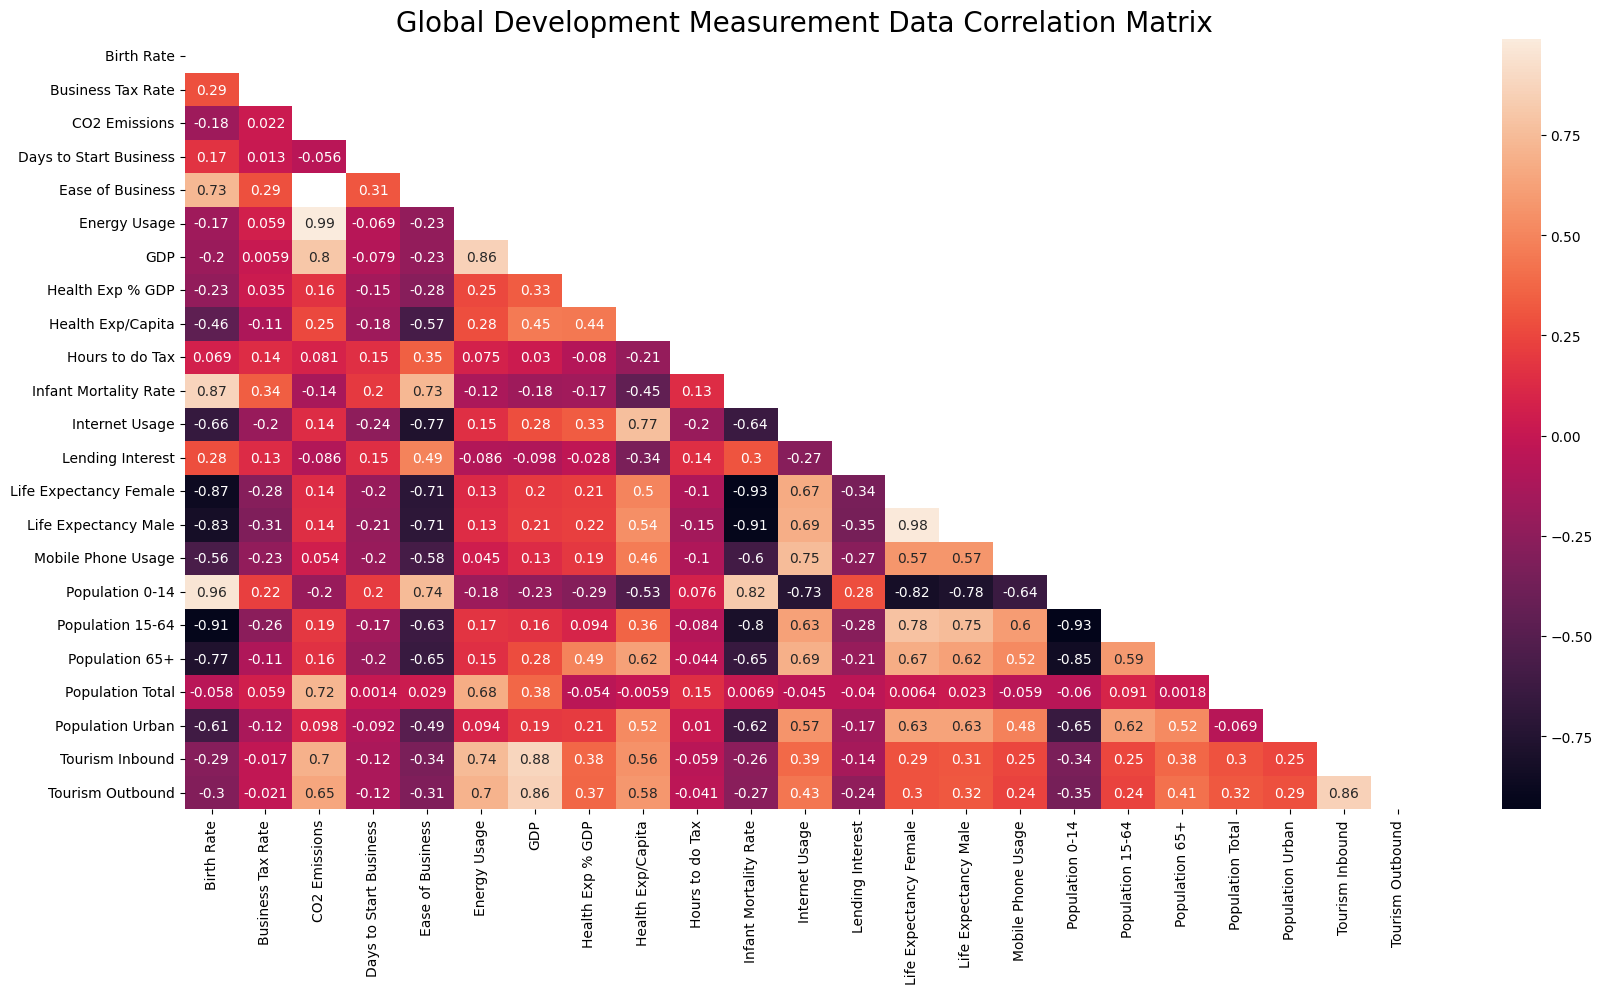

In [ ]:
# Representation of correlation matrix using Heatmap
# Generate a mask for the upper triangle
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Global Development Measurement Data Correlation Matrix', fontsize=20)
plt.show()

#### 1. Energy Usage and CO2 Emissions are highly positively correlated(r=0.99), The Energy generated through coal, natural gas, petroleum & fossil fuel causes high CO2 Emissions

#### 2. Strong Positive correlation(r=0.96) between Population of 0 to 14 and the Birth Rate, in general the population from 0 to 14 directly depends on Birth Rate. If the Birth_Rate increases the Population from 0 to 14 increases, vice versa.

#### 3. Highly Negative correlation(r=-0.93) between Life Expectancy Female and Infant Mortality Rate & (r=-0.91) Life Expectancy Male and Infant Mortality Rate, Life expectancy of both male and female highly affected by infant mortality.

#### 4. Tourism Inbound, Outbound are positively correlated with GDP respectively 0.88 & 0.86

In [ ]:
df['Country'].nunique()

208

In [ ]:
df['Country'].value_counts()

Algeria            13
Angola             13
Turkey             13
Ukraine            13
UnitedKingdom      13
                   ..
Malaysia           13
Maldives           13
Mongolia           13
Myanmar            13
VirginIslandsUS    13
Name: Country, Length: 208, dtype: int64

In [ ]:
print('The total Countries are: ', df['Country'].nunique(),)
print('The country Names are as follows:',"\n \n",  df['Country'].unique())

The total Countries are:  208
The country Names are as follows: 
 
 ['Algeria' 'Angola' 'Benin' 'Botswana' 'BurkinaFaso' 'Burundi' 'Cameroon'
 'CentralAfricanRepublic' 'Chad' 'Comoros' 'CongoDemRep' 'CongoRep'
 'CotedIvoire' 'Djibouti' 'EgyptArabRep' 'EquatorialGuinea' 'Eritrea'
 'Ethiopia' 'Gabon' 'GambiaThe' 'Ghana' 'Guinea' 'GuineaBissau' 'Kenya'
 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Mali' 'Mauritania'
 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Rwanda'
 'SaoTomeandPrincipe' 'Senegal' 'Seychelles' 'SierraLeone' 'Somalia'
 'SouthAfrica' 'SouthSudan' 'Sudan' 'Swaziland' 'Tanzania' 'Togo'
 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Bhutan' 'BruneiDarussalam' 'Cambodia' 'China'
 'Georgia' 'HongKongSARChina' 'India' 'Indonesia' 'Japan' 'Kazakhstan'
 'KoreaDemRep' 'KoreaRep' 'KyrgyzRepublic' 'LaoPDR' 'MacaoSARChina'
 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar' 'Nepal' 'Pakistan'
 'Philippines' 'Singapore' 'S

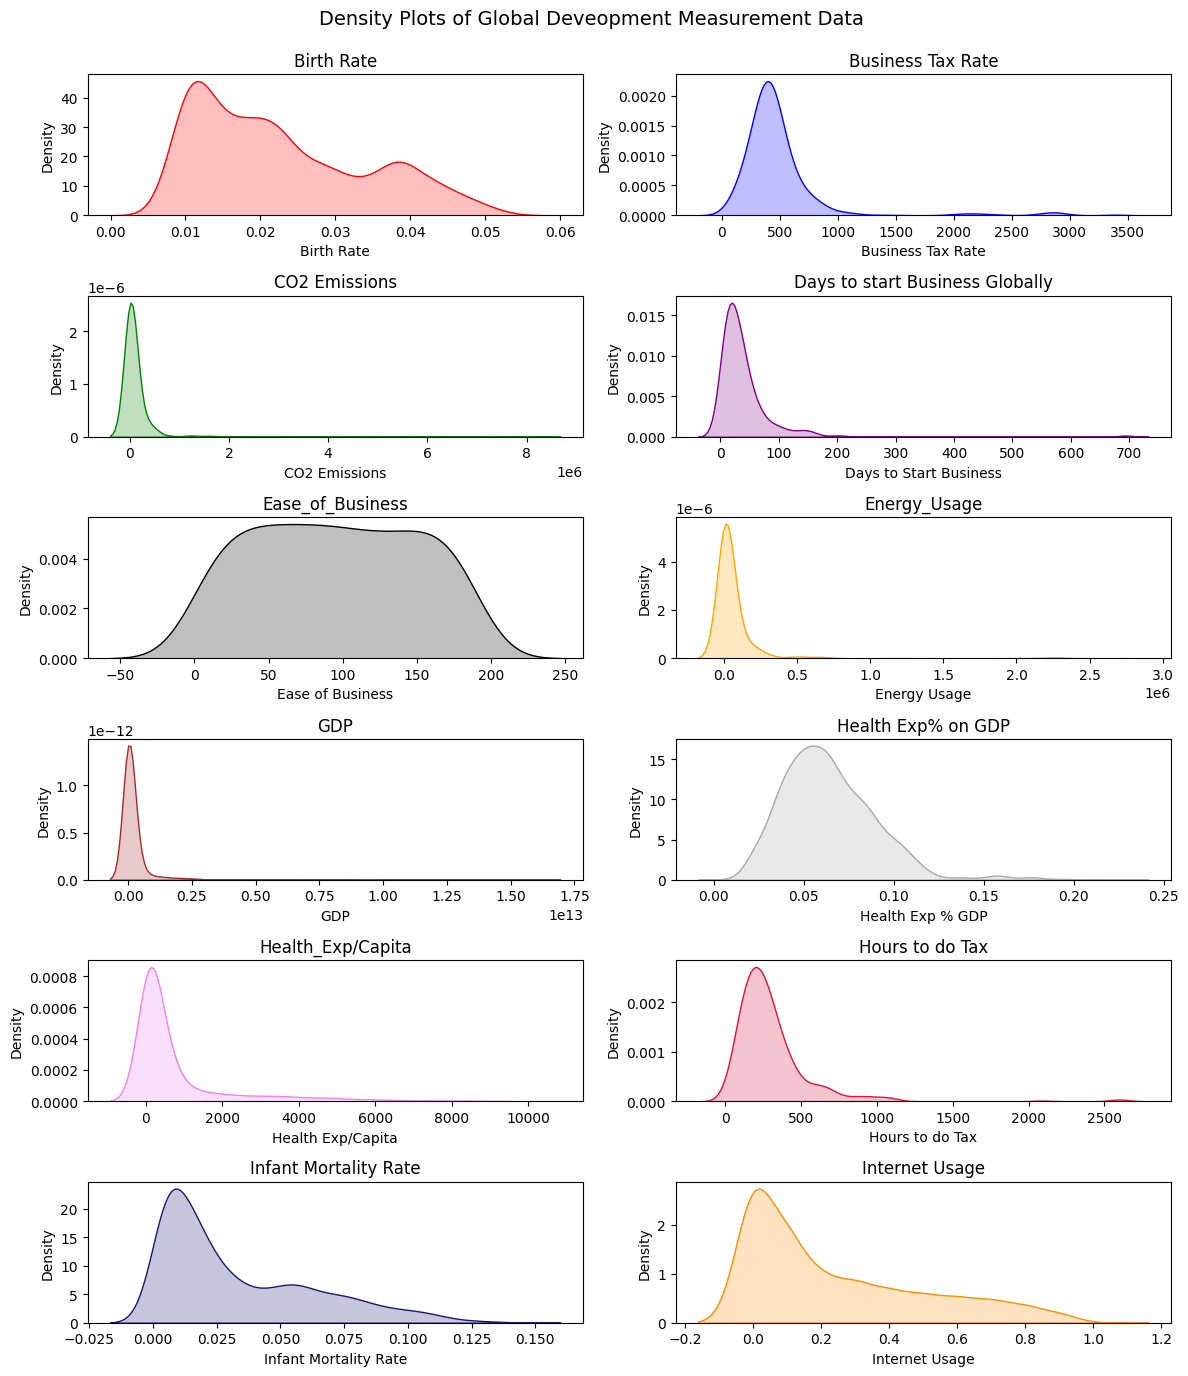

In [ ]:
#Creating Subplots to visualize independent variables data

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
#Plot KDE plots

sns.kdeplot(ax=axes[0,0], data=df['Birth Rate'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['Business Tax Rate'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['CO2 Emissions'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['Days to Start Business'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['Ease of Business'], shade=True, color='black')
sns.kdeplot(ax=axes[2,1], data=df['Energy Usage'], shade=True, color='orange')
sns.kdeplot(ax=axes[3,0], data=df['GDP'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,1], data=df['Health Exp % GDP'], shade=True, color='darkgrey')
sns.kdeplot(ax=axes[4,0], data=df['Health Exp/Capita'], shade=True, color='violet')
sns.kdeplot(ax=axes[4,1], data=df['Hours to do Tax'], shade=True, color='crimson')
sns.kdeplot(ax=axes[5,0], data=df['Infant Mortality Rate'], shade=True, color='midnightblue')
sns.kdeplot(ax=axes[5,1], data=df['Internet Usage'], shade=True, color='darkorange')

#Set plot titles and labels
axes[0,0].set_title('Birth Rate')
axes[0,1].set_title('Business Tax Rate')
axes[1,0].set_title('CO2 Emissions')
axes[1,1].set_title('Days to start Business Globally')
axes[2,0].set_title('Ease_of_Business')
axes[2,1].set_title('Energy_Usage')
axes[3,0].set_title('GDP')
axes[3,1].set_title('Health Exp% on GDP')
axes[4,0].set_title('Health_Exp/Capita')
axes[4,1].set_title('Hours to do Tax')
axes[5,0].set_title('Infant Mortality Rate')
axes[5,1].set_title('Internet Usage')


fig.suptitle('Density Plots of Global Deveopment Measurement Data \n', fontsize=14,)
plt.tight_layout()
plt.show()

##### 1. Features are right skewed distribution
##### 2.Ease of doing business is  symmetrical distribution

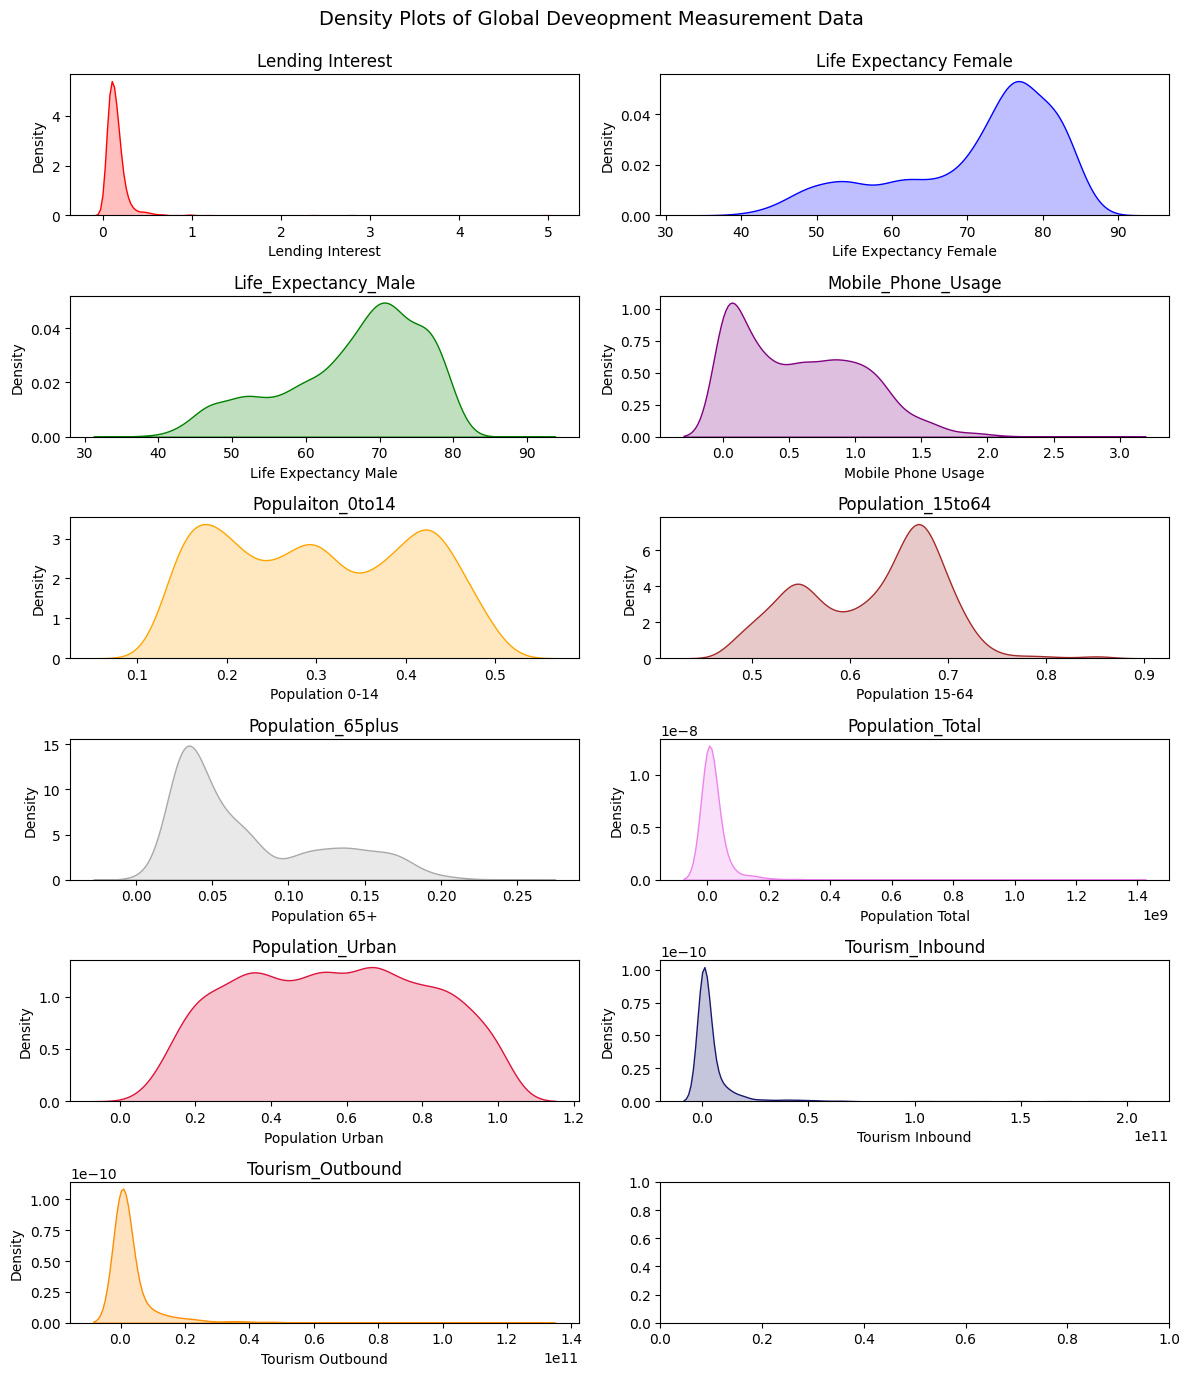

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,14))
#Plot KDE plots

sns.kdeplot(ax=axes[0,0], data=df['Lending Interest'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['Life Expectancy Female'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['Life Expectancy Male'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['Mobile Phone Usage'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['Population 0-14'], shade=True, color='orange')
sns.kdeplot(ax=axes[2,1], data=df['Population 15-64'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,0], data=df['Population 65+'], shade=True, color='darkgrey')
sns.kdeplot(ax=axes[3,1], data=df['Population Total'], shade=True, color='violet')
sns.kdeplot(ax=axes[4,0], data=df['Population Urban'], shade=True, color='crimson')
sns.kdeplot(ax=axes[4,1], data=df['Tourism Inbound'], shade=True, color='midnightblue')
sns.kdeplot(ax=axes[5,0], data=df['Tourism Outbound'], shade=True, color='darkorange')

#Set plot titles and labels
axes[0,0].set_title('Lending Interest')
axes[0,1].set_title('Life Expectancy Female')
axes[1,0].set_title('Life_Expectancy_Male')
axes[1,1].set_title('Mobile_Phone_Usage')
axes[2,0].set_title('Populaiton_0to14')
axes[2,1].set_title('Population_15to64')
axes[3,0].set_title('Population_65plus')
axes[3,1].set_title('Population_Total')
axes[4,0].set_title('Population_Urban')
axes[4,1].set_title('Tourism_Inbound')
axes[5,0].set_title('Tourism_Outbound')


fig.suptitle('Density Plots of Global Deveopment Measurement Data \n', fontsize=14,)
plt.tight_layout()
plt.show()

##### 1. Life Expectancy Female and Male & Population 15 ro 64 are left skewed distribution

##### 2. Lendning Interest Rate, Mobile Phone Usage, Population 65 plus & Tourism Inbound and Outbound are right skewed distribution

##### 3. Population Urban is symmetrical distribution

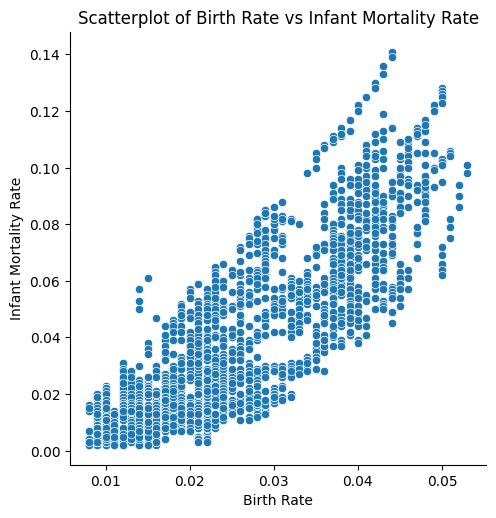

In [ ]:
# Create a scatterplot for 'Birth_Rate' and 'Infant_Mortality_Rate'
sns.pairplot(df, x_vars=['Birth Rate'], y_vars=['Infant Mortality Rate'],height=5)

plt.xlabel('Birth Rate')
plt.ylabel('Infant Mortality Rate')
plt.title('Scatterplot of Birth Rate vs Infant Mortality Rate')
plt.show()

##### The data  are overlapping and not spreaded, it means that there is a strong positive linear relationship between Birth Rate and Infant Mortality Rate

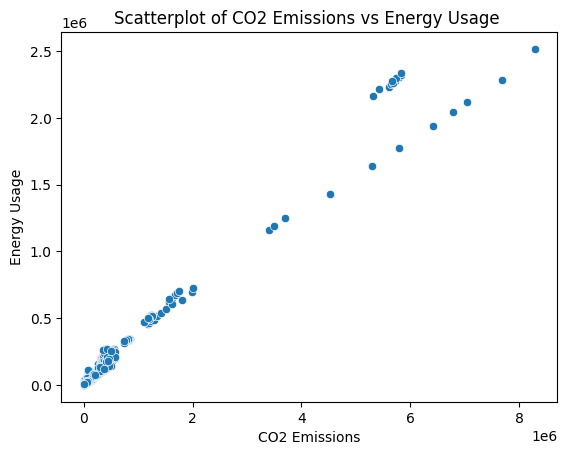

In [ ]:
# Create a scatterplot for CO2 Emissions and Energy
sns.scatterplot(x='CO2 Emissions', y='Energy Usage',data=df)

plt.xlabel('CO2 Emissions')
plt.ylabel('Energy Usage')
plt.title('Scatterplot of CO2 Emissions vs Energy Usage ')
plt.show()

##### Positive linear relationship between Energy usage and CO2 Emissions.From above we say that CO2 depends on Energy Usage

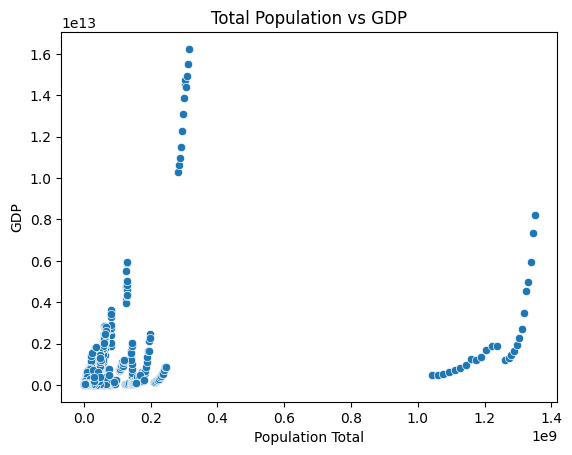

In [ ]:
sns.scatterplot(x='Population Total', y= 'GDP', data=df)
plt.title('Total Population vs GDP')
plt.show()

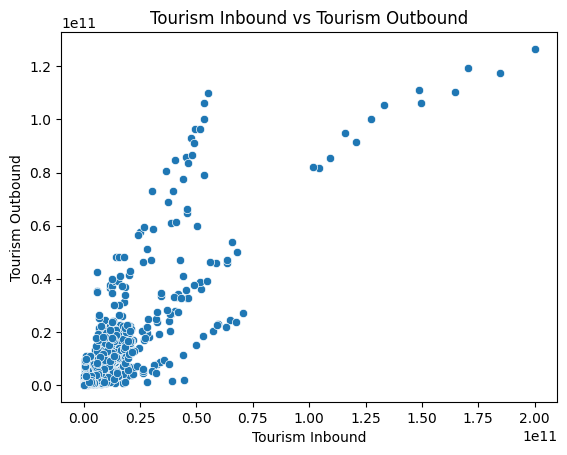

In [ ]:
sns.scatterplot(x='Tourism Inbound', y='Tourism Outbound', data=df)
plt.title('Tourism Inbound vs Tourism Outbound')
plt.show()

In [ ]:
# Extracting the top 10 GDP countries by using groupy
highest_gdp = df.groupby('Country')['GDP'].max()
highest_gdp=highest_gdp.sort_values(ascending=False)
highest_gdp.head(10)

Country
UnitedStates         1.624460e+13
China                8.229490e+12
Japan                5.937767e+12
Germany              3.628110e+12
UnitedKingdom        2.857083e+12
France               2.831795e+12
Brazil               2.476695e+12
Italy                2.307312e+12
RussianFederation    2.017471e+12
India                1.880100e+12
Name: GDP, dtype: float64

In [ ]:
# Extracting data countrywise to understand the patterns of the data
US_data=df[df['Country']=='UnitedStates']
China_data=df[df['Country']=='China']
Japan_data=df[df['Country']=='Japan']
Germany_data=df[df['Country']=='Germany']
UK_data=df[df['Country']=='UnitedKingdom']
France_data=df[df['Country']=='France']
Brazil_data=df[df['Country']=='Brazil']
Italy_data=df[df['Country']=='Italy']
Russia_data=df[df['Country']=='RussianFederation']
India_data=df[df['Country']=='India']
China_data

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
60,0.014,NaN,3405180.0,China,NaN,NaN,1161353.0,1.198475e+12,0.046,43.0,...,74.0,71.0,0.1,0.256,0.675,0.069,1262645000,0.359,1.731800e+10,1.416900e+10
268,0.013,NaN,3487566.0,China,NaN,NaN,1186797.0,1.324807e+12,0.046,47.0,...,74.0,71.0,0.1,0.246,0.683,0.070,1271850000,0.371,1.900600e+10,1.499200e+10
476,0.013,NaN,3694242.0,China,NaN,NaN,1253831.0,1.453828e+12,0.048,54.0,...,74.0,72.0,0.2,0.236,0.692,0.072,1280400000,0.384,2.174200e+10,1.675900e+10
684,0.012,NaN,4525177.0,China,48.0,NaN,1427554.0,1.640959e+12,0.048,61.0,...,75.0,72.0,0.2,0.225,0.702,0.074,1288400000,0.398,1.870700e+10,1.671600e+10
892,0.012,NaN,5288166.0,China,48.0,NaN,1639854.0,1.931644e+12,0.047,70.0,...,75.0,73.0,0.3,0.214,0.711,0.075,1296075000,0.411,2.775500e+10,2.136000e+10
1100,0.012,800.0,5790017.0,China,48.0,NaN,1775677.0,2.256903e+12,0.047,80.0,...,75.0,73.0,0.3,0.205,0.718,0.077,1303720000,0.425,3.184200e+10,2.472100e+10
1308,0.012,807.0,6414463.0,China,35.0,NaN,1938944.0,2.712951e+12,0.046,93.0,...,76.0,73.0,0.3,0.198,0.724,0.078,1311020000,0.439,3.713200e+10,2.824200e+10
1516,0.012,812.0,6791805.0,China,35.0,NaN,2044606.0,3.494056e+12,0.044,113.0,...,76.0,73.0,0.4,0.192,0.729,0.079,1317885000,0.452,4.112600e+10,3.326900e+10
1724,0.012,799.0,7035444.0,China,41.0,NaN,2120814.0,4.521827e+12,0.046,155.0,...,76.0,73.0,0.5,0.187,0.732,0.081,1324655000,0.465,4.413000e+10,4.098700e+10
1932,0.012,638.0,7692211.0,China,38.0,NaN,2286137.0,4.990234e+12,0.051,189.0,...,76.0,73.0,0.6,0.184,0.734,0.082,1331260000,0.479,4.263200e+10,4.710800e+10


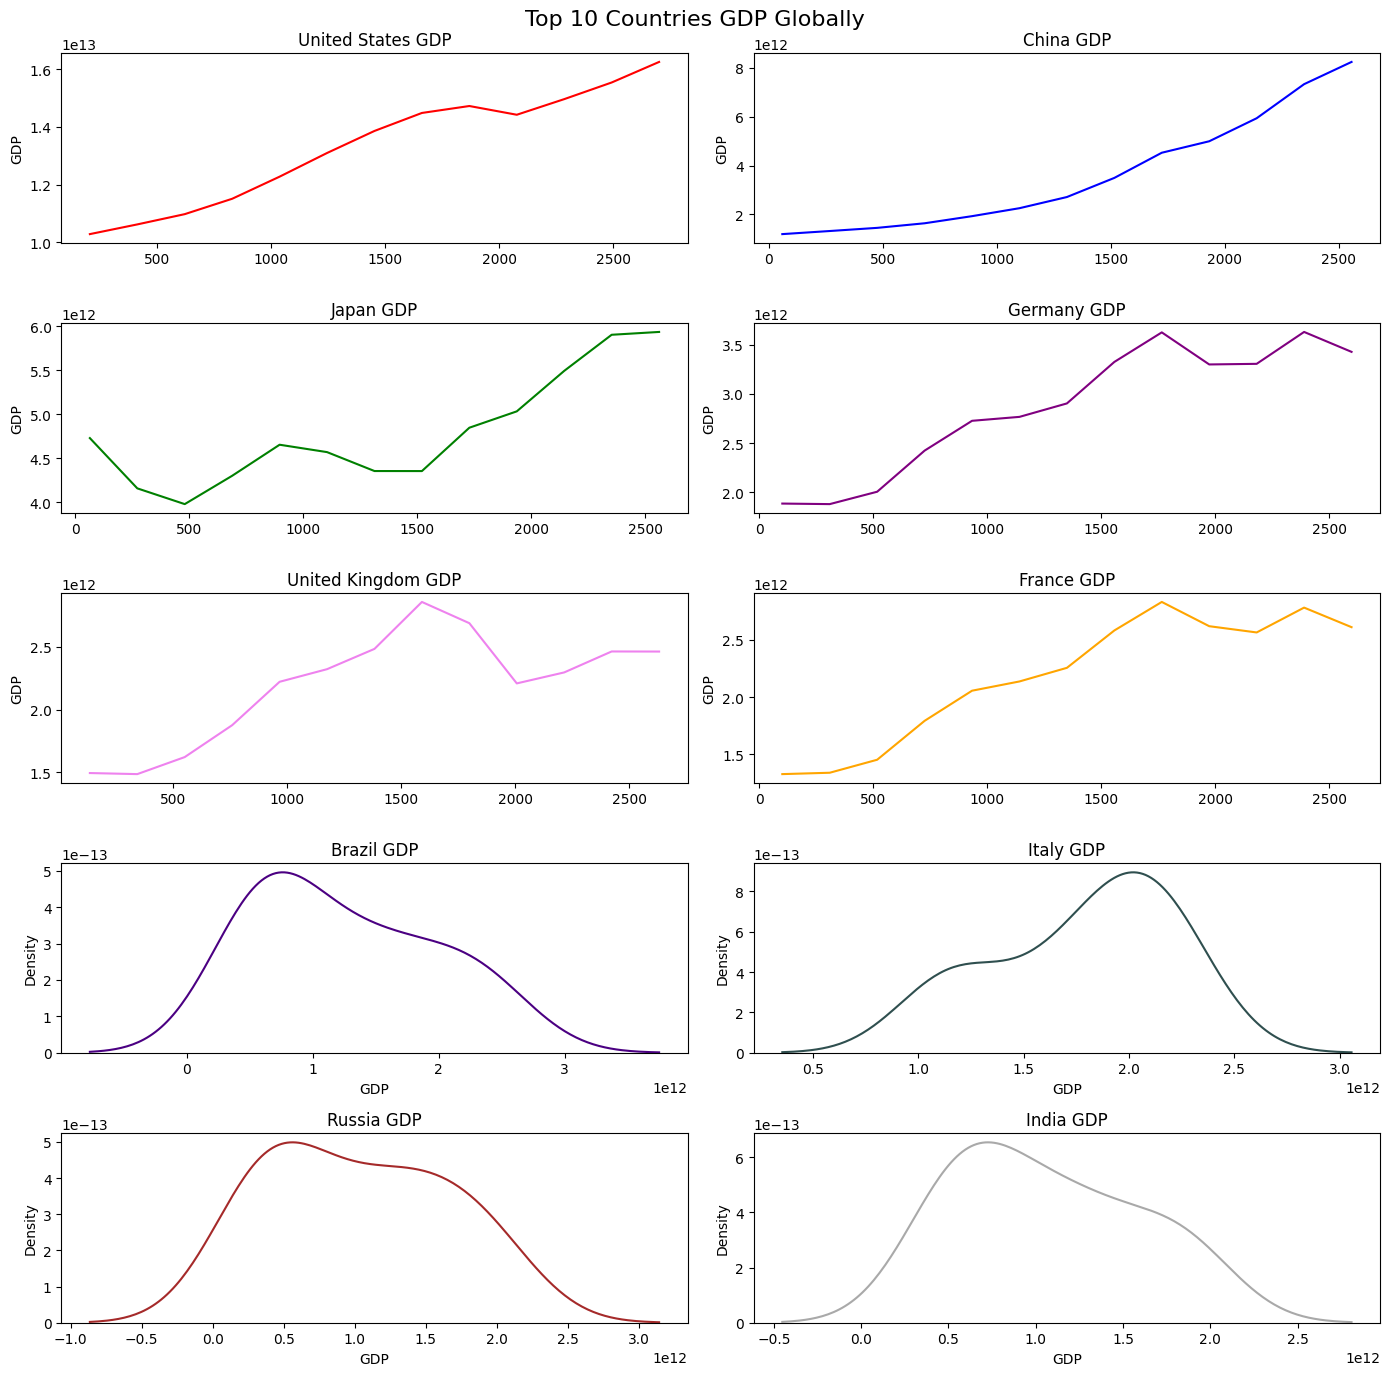

In [ ]:
# Plotting Top 10 Coutries GDP
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 14))

#Plot KDE plots

sns.lineplot(ax=axes[0,0], data=US_data['GDP'],  color='red')
sns.lineplot(ax=axes[0,1], data=China_data['GDP'],  color='blue')
sns.lineplot(ax=axes[1,0], data=Japan_data['GDP'],  color='green')
sns.lineplot(ax=axes[1,1], data=Germany_data['GDP'],  color='purple')
sns.lineplot(ax=axes[2,0], data=UK_data['GDP'],  color='violet')
sns.lineplot(ax=axes[2,1], data=France_data['GDP'],  color='orange')
sns.kdeplot(ax=axes[3,0], data=Brazil_data['GDP'], color='indigo')
sns.kdeplot(ax=axes[3,1], data=Italy_data['GDP'], color='darkslategrey')
sns.kdeplot(ax=axes[4,0], data=Russia_data['GDP'], color='brown')
sns.kdeplot(ax=axes[4,1], data=India_data['GDP'], color='darkgrey')

#Set plot titles and labels
axes[0,0].set_title('United States GDP')
axes[0,1].set_title('China GDP')
axes[1,0].set_title('Japan GDP')
axes[1,1].set_title('Germany GDP')
axes[2,0].set_title('United Kingdom GDP')
axes[2,1].set_title('France GDP')
axes[3,0].set_title('Brazil GDP')
axes[3,1].set_title('Italy GDP')
axes[4,0].set_title('Russia GDP')
axes[4,1].set_title('India GDP')

fig.suptitle('Top 10 Countries GDP Globally', fontsize=16)
plt.tight_layout()
plt.show()

##### We can observe that the countries United States, China, Japan , Germany, United kingdom & France are having clear increasing trend

##### Brazil, Italy, Russia and India are having decreasing Trend over a period of time

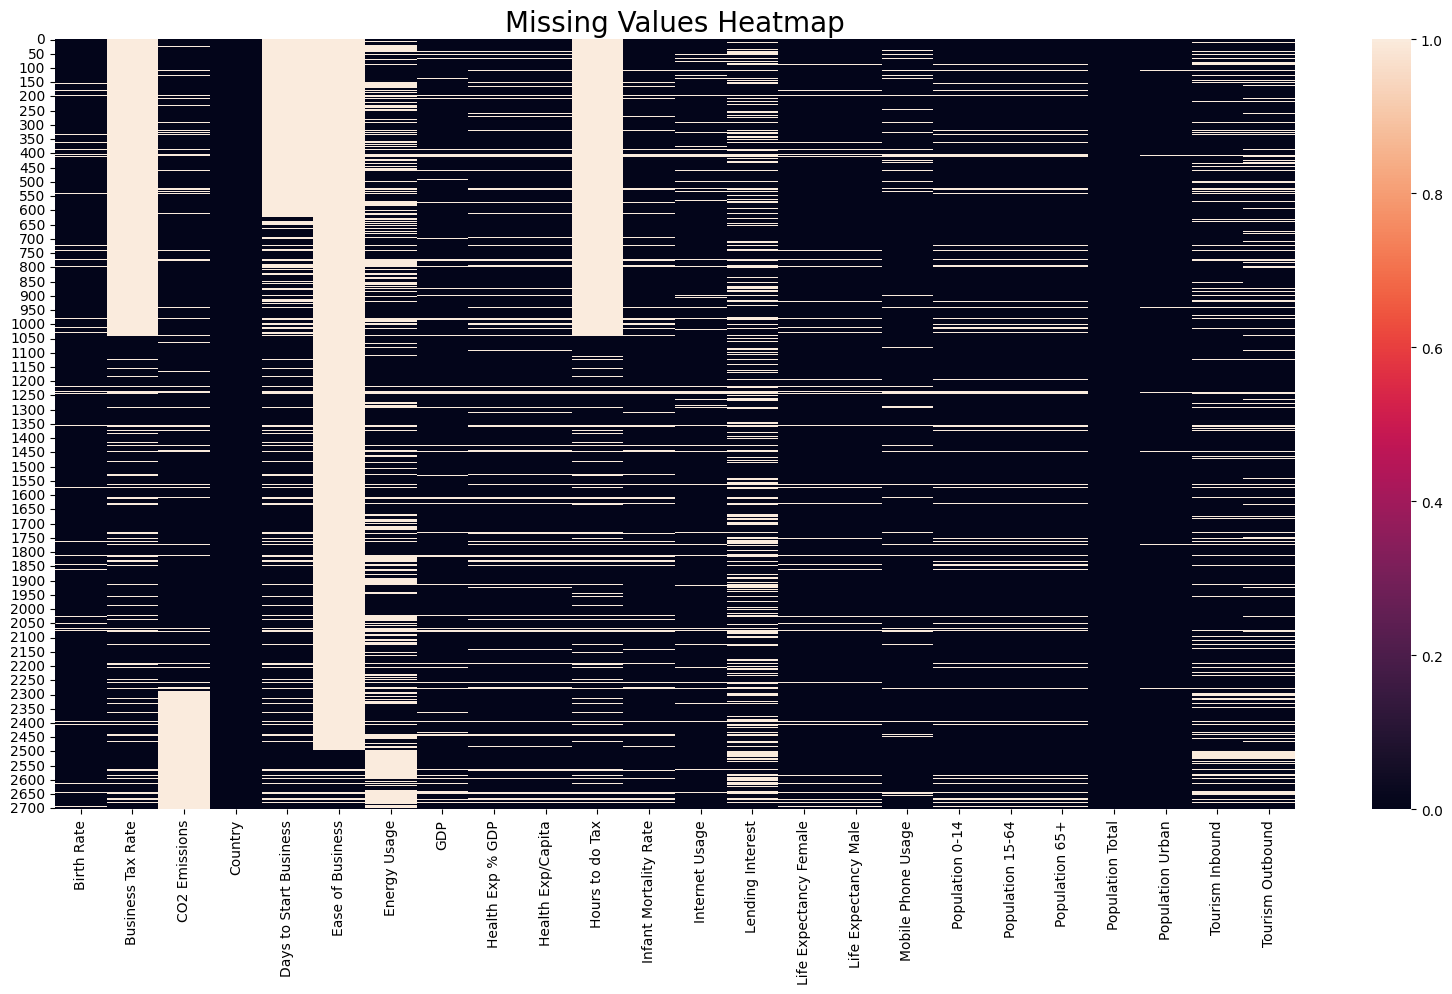

In [ ]:
# Plotting missing values of the data by using Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap', fontsize=20)
plt.show()

Ease of doing business has highest missing values, followed by Hours to do tax & Business Tax Rate

Country, Number of Records & Total Population are the only features which doesnt have any missing values

## Handling Missing Values

In [ ]:
# Null Values Percentage
null_pertanage=[]
def null_per(x):
    for i in x.columns:
        a=x[i].isnull().sum()/len(x[i]) * 100
        a=round(a,2)
        print(i ,':' ,'\t',a)
        if a>=0:
            null_pertanage.append(i)
null_per(df)

Birth Rate : 	 4.4
Business Tax Rate : 	 47.37
CO2 Emissions : 	 21.41
Country : 	 0.0
Days to Start Business : 	 36.46
Ease of Business : 	 93.16
Energy Usage : 	 33.99
GDP : 	 7.77
Health Exp % GDP : 	 11.43
Health Exp/Capita : 	 11.43
Hours to do Tax : 	 47.63
Infant Mortality Rate : 	 9.62
Internet Usage : 	 6.4
Lending Interest : 	 30.47
Life Expectancy Female : 	 5.03
Life Expectancy Male : 	 5.03
Mobile Phone Usage : 	 6.18
Population 0-14 : 	 8.14
Population 15-64 : 	 8.14
Population 65+ : 	 8.14
Population Total : 	 0.0
Population Urban : 	 0.96
Tourism Inbound : 	 13.61
Tourism Outbound : 	 17.42


In [ ]:
# Dropping Ease of Business which has 93% missing values
df=df.drop('Ease of Business',axis=1)

### Using KNN Imputer for missing values

In [ ]:
from sklearn.impute import KNNImputer
knnimputer=KNNImputer(n_neighbors=3)
df_=df.drop('Country', axis=1)
imputed=knnimputer.fit_transform(df_)
df_=pd.DataFrame(imputed, columns=df_.columns)
df_

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020000,440.333333,87931.000000,32.666667,2.699800e+04,5.479006e+10,0.035000,60.0,275.666667,0.034,...,71.000000,67.000000,0.000000,0.342,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08
1,0.050000,405.333333,9542.000000,22.000000,7.499000e+03,9.129595e+09,0.034000,22.0,241.333333,0.128,...,47.000000,44.000000,0.000000,0.476,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08
2,0.043000,405.333333,1617.000000,22.000000,1.983000e+03,2.359122e+09,0.043000,15.0,241.333333,0.090,...,57.000000,53.000000,0.000000,0.454,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07
3,0.027000,405.333333,4276.000000,22.000000,1.836000e+03,5.788312e+09,0.047000,152.0,241.333333,0.054,...,52.000000,49.000000,0.100000,0.383,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08
4,0.046000,546.333333,1041.000000,36.666667,1.348933e+04,2.610959e+09,0.051000,12.0,296.000000,0.096,...,52.000000,49.000000,0.000000,0.468,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.011667,489.333333,160.000000,26.000000,7.800000e+01,2.741753e+09,0.033333,2796.0,132.000000,0.004,...,82.666667,76.666667,0.433333,0.291,0.638667,0.070333,32427.0,0.911,5.036667e+08,1.403333e+08
2700,0.013000,464.000000,79142.666667,5.000000,2.132446e+06,1.624460e+13,0.179000,8895.0,175.000000,0.006,...,81.000000,76.000000,1.000000,0.196,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,0.015000,419.000000,590.333333,7.000000,2.226300e+04,5.000435e+10,0.089000,1308.0,310.000000,0.010,...,80.000000,74.000000,1.500000,0.220,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09
2702,0.020000,619.000000,79142.666667,144.000000,2.163900e+04,3.812862e+11,0.046000,593.0,792.000000,0.013,...,78.000000,72.000000,1.000000,0.288,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09


In [ ]:
# Droppping features with high missing values, unnecessary features
df_=df_.drop(columns=['Business Tax Rate', 'Hours to do Tax','Days to Start Business','Lending Interest','Health Exp/Capita'], axis=True)

df_

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020000,87931.000000,2.699800e+04,5.479006e+10,0.035000,0.034,0.000000,71.000000,67.000000,0.000000,0.342,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08
1,0.050000,9542.000000,7.499000e+03,9.129595e+09,0.034000,0.128,0.000000,47.000000,44.000000,0.000000,0.476,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08
2,0.043000,1617.000000,1.983000e+03,2.359122e+09,0.043000,0.090,0.000000,57.000000,53.000000,0.000000,0.454,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07
3,0.027000,4276.000000,1.836000e+03,5.788312e+09,0.047000,0.054,0.000000,52.000000,49.000000,0.100000,0.383,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08
4,0.046000,1041.000000,1.348933e+04,2.610959e+09,0.051000,0.096,0.000000,52.000000,49.000000,0.000000,0.468,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.011667,160.000000,7.800000e+01,2.741753e+09,0.033333,0.004,0.466667,82.666667,76.666667,0.433333,0.291,0.638667,0.070333,32427.0,0.911,5.036667e+08,1.403333e+08
2700,0.013000,79142.666667,2.132446e+06,1.624460e+13,0.179000,0.006,0.800000,81.000000,76.000000,1.000000,0.196,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,0.015000,590.333333,2.226300e+04,5.000435e+10,0.089000,0.010,0.500000,80.000000,74.000000,1.500000,0.220,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09
2702,0.020000,79142.666667,2.163900e+04,3.812862e+11,0.046000,0.013,0.500000,78.000000,72.000000,1.000000,0.288,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09


In [ ]:
null_per(df_)

Birth Rate : 	 0.0
CO2 Emissions : 	 0.0
Energy Usage : 	 0.0
GDP : 	 0.0
Health Exp % GDP : 	 0.0
Infant Mortality Rate : 	 0.0
Internet Usage : 	 0.0
Life Expectancy Female : 	 0.0
Life Expectancy Male : 	 0.0
Mobile Phone Usage : 	 0.0
Population 0-14 : 	 0.0
Population 15-64 : 	 0.0
Population 65+ : 	 0.0
Population Total : 	 0.0
Population Urban : 	 0.0
Tourism Inbound : 	 0.0
Tourism Outbound : 	 0.0


## Outliers Detection with IQR

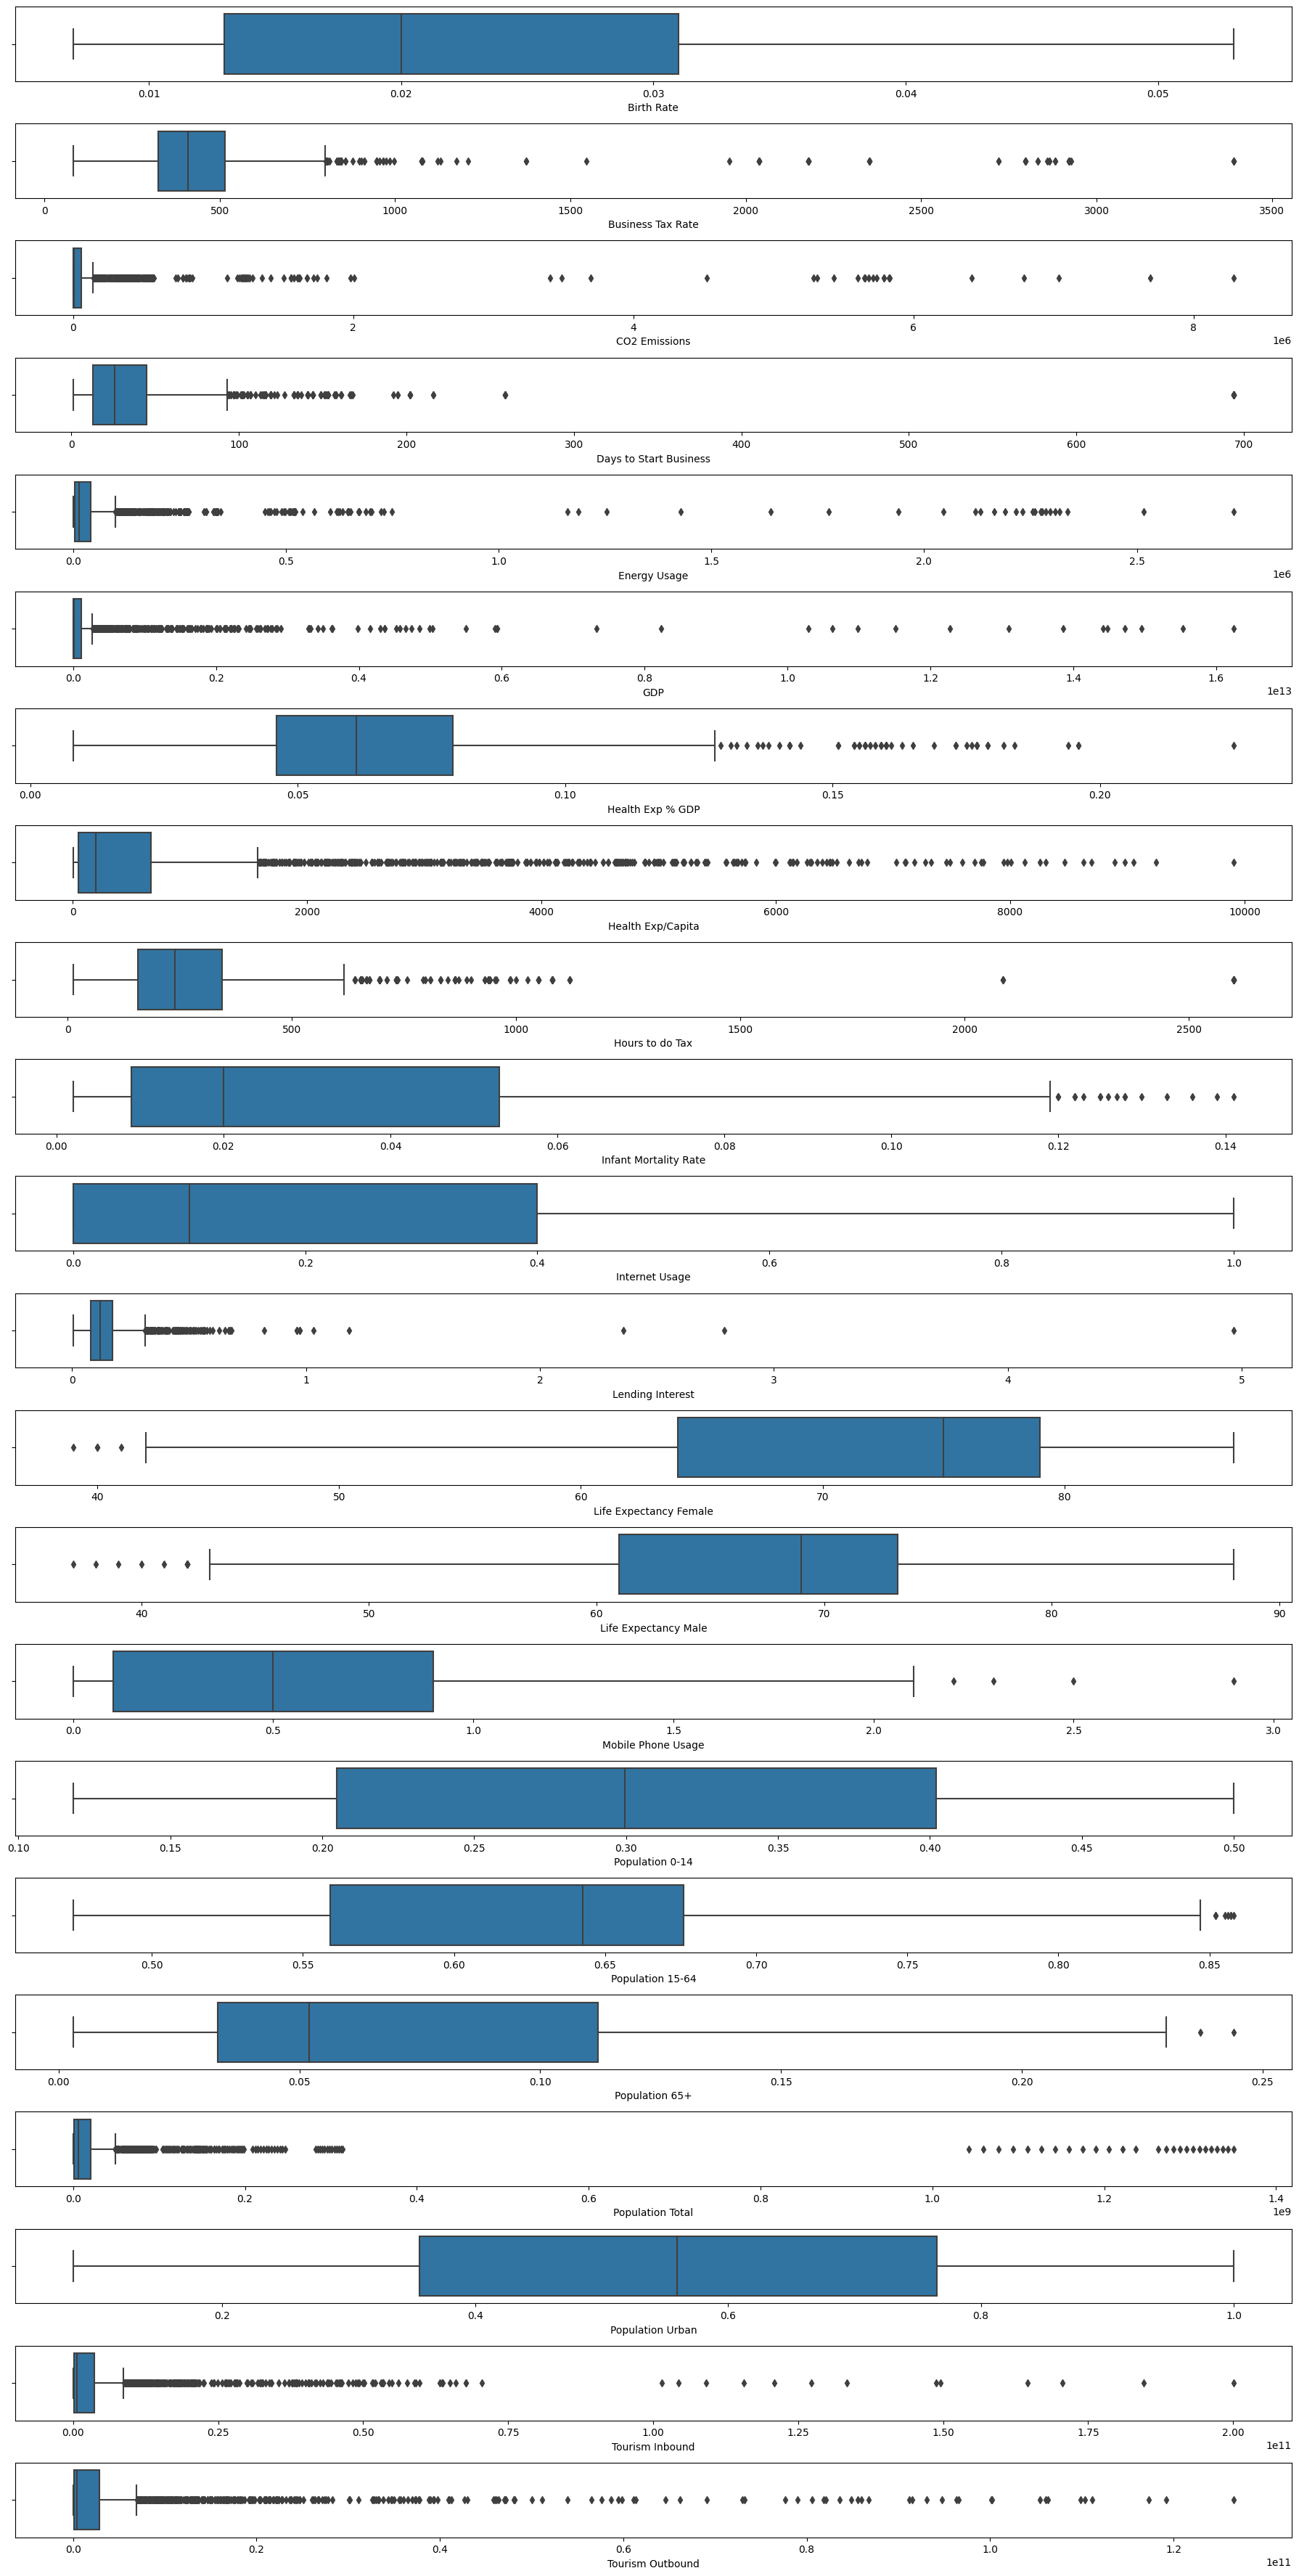

In [ ]:
# Plotting Boxplot to find the outliers in the dataset
df_box=df.drop('Country', axis=1)
plt.figure(figsize=(18,40))
for i, j in enumerate(df_box.columns):
    plt.subplot(25,1,i+1)
    sns.boxplot(x=df_box[j])
    plt.xlabel(j)
    plt.tight_layout()

## Outlier Removing with IQR

In [ ]:
for cols in df.columns:
    if cols != 'Country':
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[cols] = np.where(df[cols] < lower_bound, lower_bound, df[cols])
        df[cols] = np.where(df[cols] > upper_bound, upper_bound, df[cols])

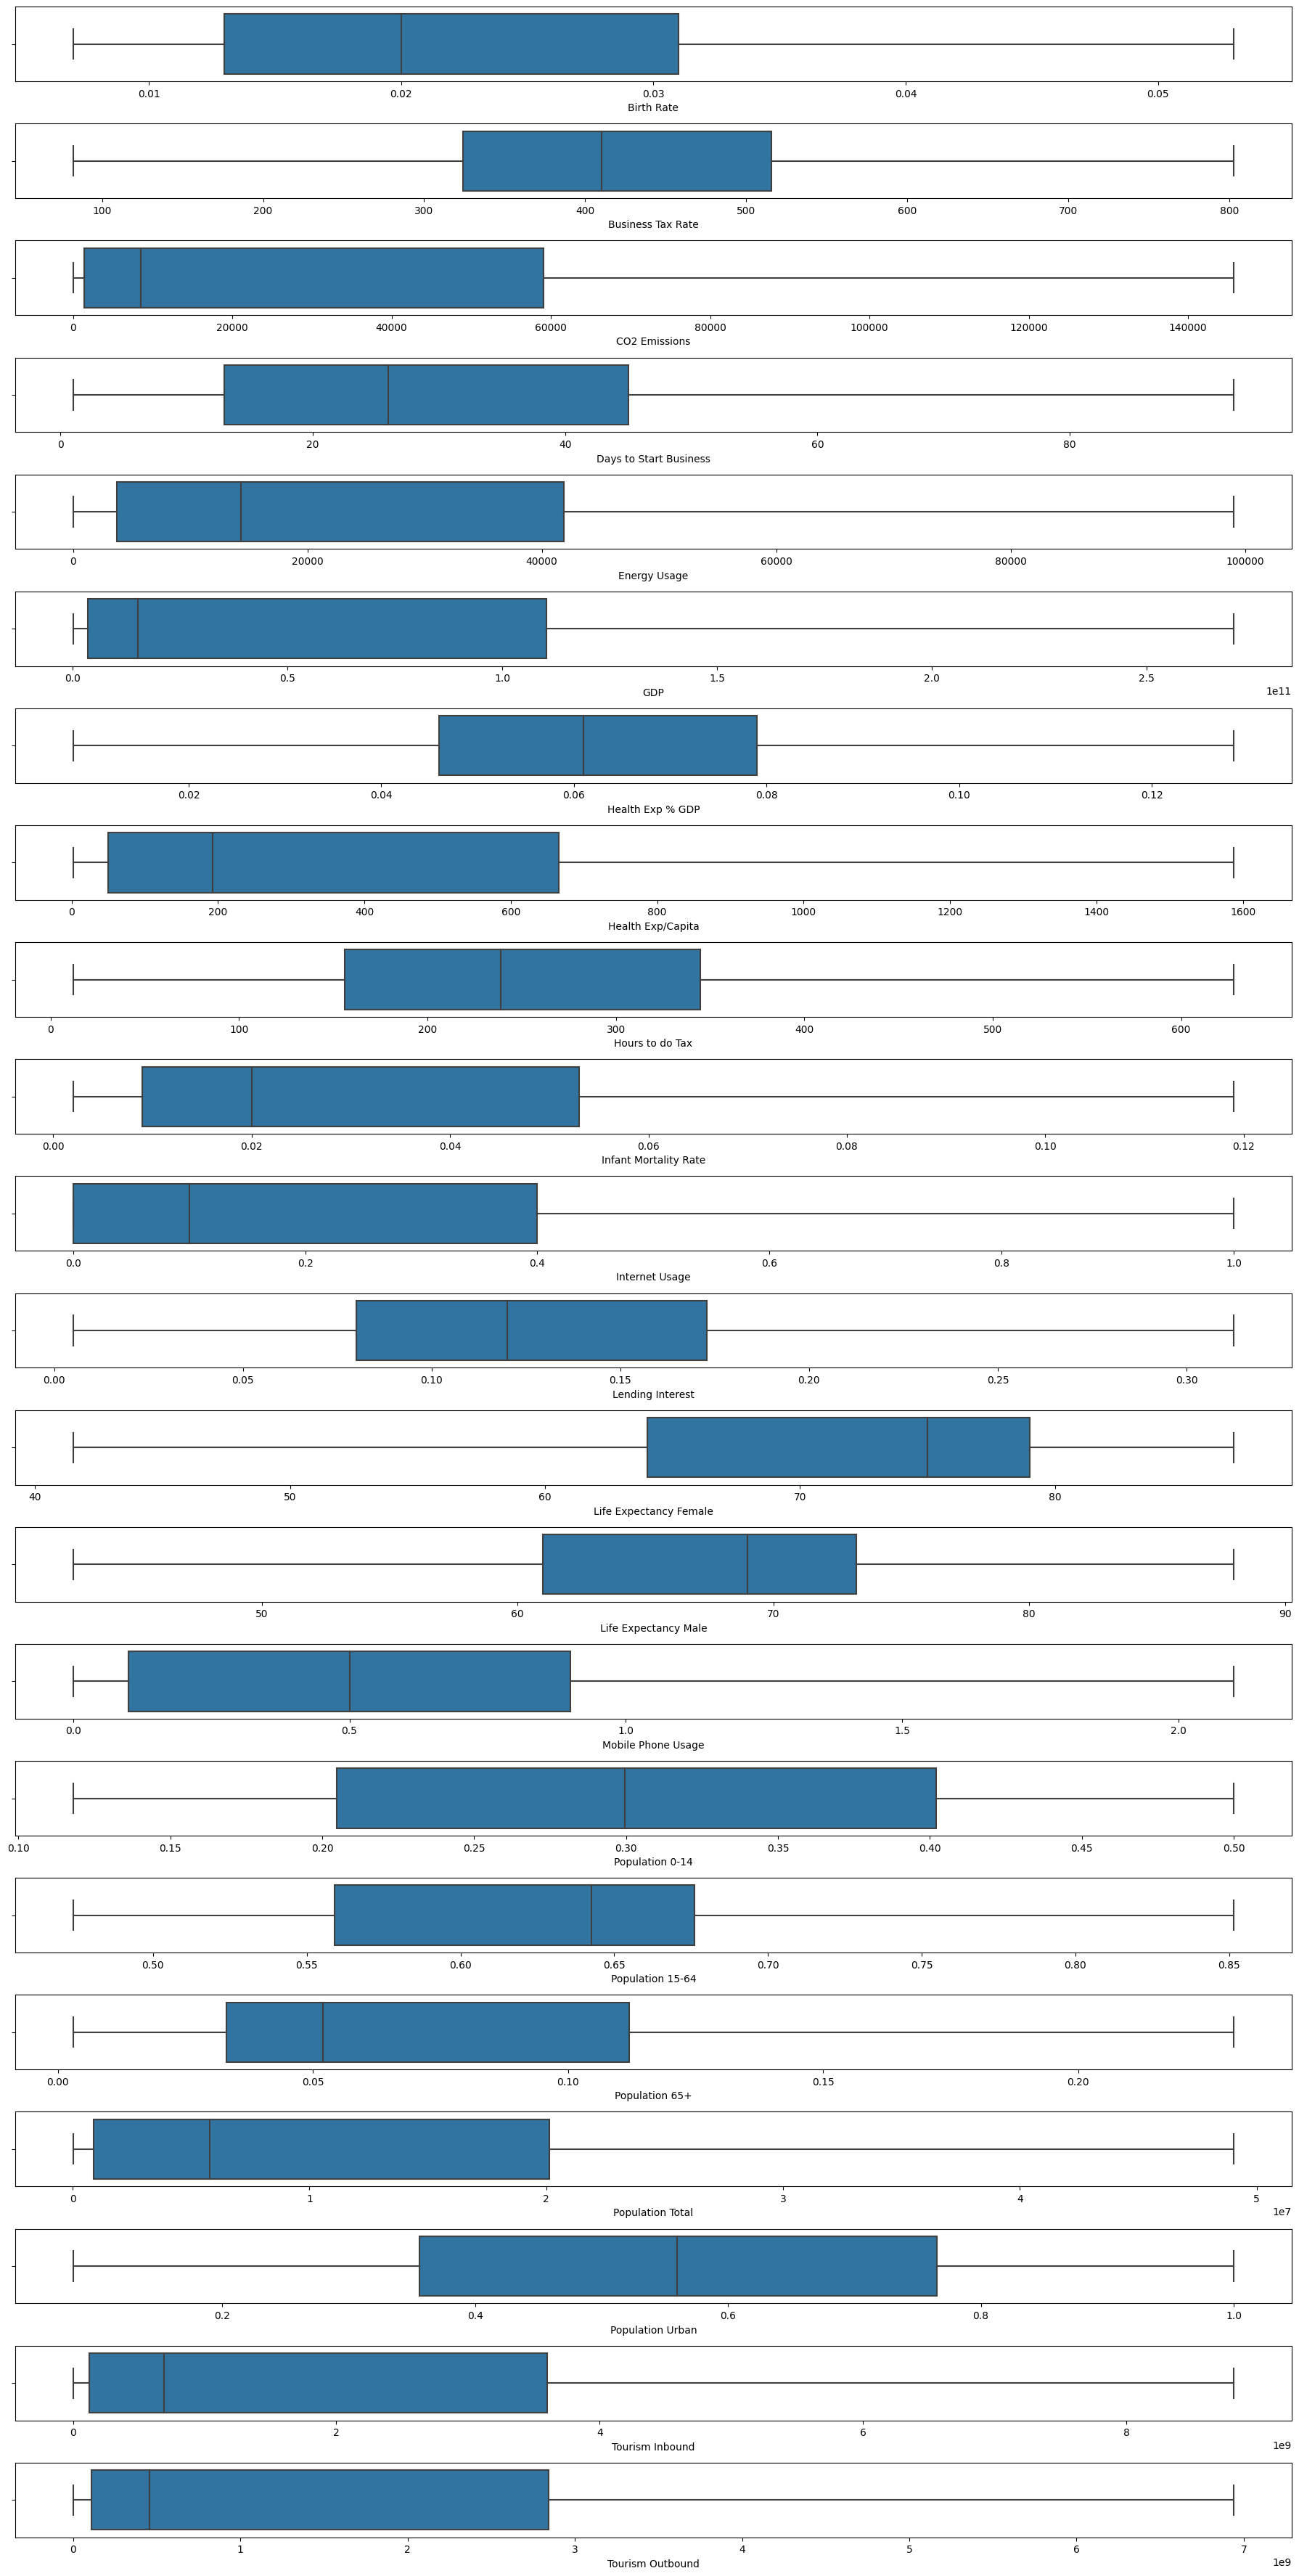

In [ ]:
# Plotting Boxplot to find the outliers in the dataset
df_box=df.drop('Country', axis=1)
plt.figure(figsize=(18,40))
for i, j in enumerate(df_box.columns):
    plt.subplot(25,1,i+1)
    sns.boxplot(x=df_box[j])
    plt.xlabel(j)
    plt.tight_layout()

In [ ]:
# Checking for the Pattern Match that the sum of three columns Population 0 to 14, 15 to 64 & 65+ are approximately equal to one
a=df['Population 0-14']+df['Population 15-64']+df['Population 65+']

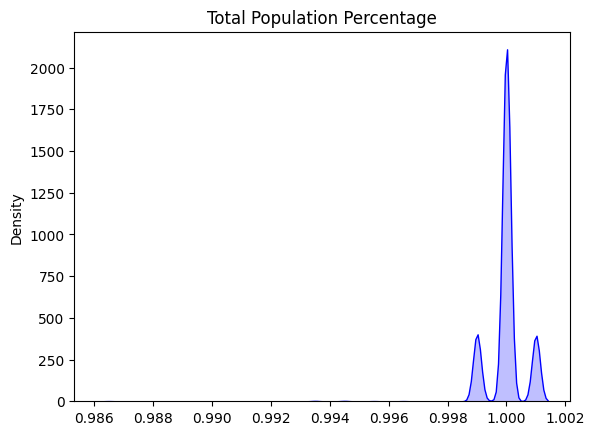

In [ ]:
# Calculating Total Populaion Percentage(it should be 1) Pattern after imputing the missing values
sns.kdeplot(a, shade=True, color='blue')
plt.title('Total Population Percentage')
plt.show()

##### After imputing the missing values we can observe that the data is lying in between 0.999 to 1.0010, hence we can say that we have imputed the missing data successfully without any deviation

#hierarchical clustering

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df_.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,9542.0,7499.000000,9.129595e+09,0.034,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,1617.0,1983.000000,2.359122e+09,0.043,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,4276.0,1836.000000,5.788312e+09,0.047,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,1041.0,13489.333333,2.610959e+09,0.051,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df_.iloc[:,:])
df_norm.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.282609,0.010610,0.009895,0.003369,0.124424,0.230216,0.0,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506,0.001523
1,0.934783,0.001151,0.002746,0.000558,0.119816,0.906475,0.0,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.010296,0.263617,0.000166,0.001152
2,0.782609,0.000194,0.000724,0.000141,0.161290,0.633094,0.0,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.005131,0.327887,0.000381,0.000393
3,0.434783,0.000515,0.000670,0.000352,0.179724,0.374101,0.0,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.001286,0.490196,0.001131,0.001650
4,0.847826,0.000125,0.004942,0.000157,0.198157,0.676259,0.0,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.008580,0.104575,0.000111,0.000235


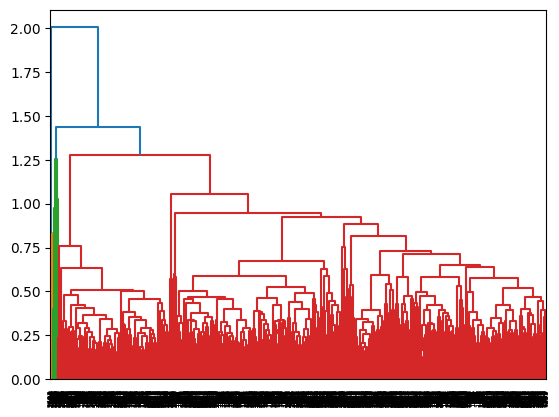

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')

In [ ]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)

In [ ]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
df_['h_clusterid'] = Clusters
df_.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,h_clusterid
0,0.020,87931.0,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2
1,0.050,9542.0,7499.000000,9.129595e+09,0.034,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,3
2,0.043,1617.0,1983.000000,2.359122e+09,0.043,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,3
3,0.027,4276.0,1836.000000,5.788312e+09,0.047,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,2
4,0.046,1041.0,13489.333333,2.610959e+09,0.051,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,3


In [ ]:
df_.sort_values("h_clusterid")

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,h_clusterid
2348,0.012,7.914267e+04,2.727728e+06,7.321892e+12,0.051,0.013000,0.4,76.0,74.0,0.7,0.180,0.735,0.085,1.344130e+09,0.506,5.331300e+10,7.901000e+10,0
2556,0.012,3.077367e+04,2.203633e+04,8.229490e+12,0.054,0.012000,0.4,77.0,74.0,0.8,0.180,0.733,0.087,1.350695e+09,0.519,5.493700e+10,1.098980e+11,0
60,0.014,3.405180e+06,1.161353e+06,1.198475e+12,0.046,0.030000,0.0,74.0,71.0,0.1,0.256,0.675,0.069,1.262645e+09,0.359,1.731800e+10,1.416900e+10,1
63,0.026,1.186663e+06,4.571980e+05,4.766091e+11,0.043,0.067000,0.0,63.0,61.0,0.0,0.342,0.614,0.044,1.042262e+09,0.277,3.598000e+09,3.686000e+09,1
1308,0.012,6.414463e+06,1.938944e+06,2.712951e+12,0.046,0.019000,0.1,76.0,73.0,0.3,0.198,0.724,0.078,1.311020e+09,0.439,3.713200e+10,2.824200e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,0.007,3.841500e+04,1.280800e+04,1.690998e+11,0.053,0.105000,0.6,85.0,79.0,1.2,0.148,0.732,0.119,6.783500e+06,1.000,1.187400e+10,1.327000e+10,5
1726,0.011,3.857300e+04,1.413900e+04,2.192797e+11,0.057,0.105000,0.7,86.0,79.0,1.7,0.128,0.747,0.125,6.957800e+06,1.000,2.023600e+10,1.609500e+10,5
1518,0.010,3.996300e+04,1.433800e+04,2.115974e+11,0.057,0.105000,0.6,85.0,79.0,1.6,0.132,0.744,0.124,6.916300e+06,1.000,1.823700e+10,1.504200e+10,5
1102,0.008,4.054600e+04,1.266400e+04,1.815701e+11,0.057,0.105000,0.6,85.0,79.0,1.2,0.142,0.736,0.121,6.813200e+06,1.000,1.358800e+10,1.330500e+10,5


In [ ]:
df_clust = df_.groupby('h_clusterid').mean()
df_clust

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
h_clusterid,,,,,,,,,,,,,,,,,
0,0.012000,5.495817e+04,1.374882e+06,7.775691e+12,0.052500,0.012500,0.400000,76.500000,74.000000,0.750000,0.180000,0.734000,0.086000,1.347412e+09,0.512500,5.412500e+10,9.445400e+10
1,0.018125,3.295754e+06,1.095749e+06,1.889561e+12,0.043917,0.039000,0.075000,70.125000,67.291667,0.279167,0.269083,0.669958,0.060958,1.215262e+09,0.355042,1.977479e+10,1.783867e+10
2,0.017430,8.086773e+04,4.072923e+04,2.045982e+11,0.064951,0.017242,0.312102,76.319704,70.837274,0.690936,0.260385,0.652209,0.087407,1.861478e+07,0.635749,4.395716e+09,4.128932e+09
3,0.039379,1.021008e+04,1.601890e+04,1.625217e+10,0.058856,0.075711,0.028571,55.338259,53.160920,0.198632,0.440000,0.529964,0.030018,1.871015e+07,0.313534,5.125880e+08,3.838570e+08
4,0.013769,4.799313e+06,2.250944e+06,1.330715e+13,0.161154,0.006692,0.653846,80.230769,75.153846,0.715385,0.204154,0.669385,0.126385,2.983420e+08,0.800923,1.408008e+11,1.024878e+11
5,0.011231,1.667162e+04,1.713923e+04,1.426286e+11,0.055769,0.105641,0.450000,83.730769,76.653846,1.026923,0.179077,0.697962,0.122846,5.326213e+06,0.970269,1.048931e+10,8.153038e+09


In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
df_['h_clusterid'] = Clusters

In [ ]:
df_.sort_values("h_clusterid")

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,h_clusterid
0,0.020,8.793100e+04,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,3.171945e+07,0.599,1.020000e+08,1.930000e+08,0
1791,0.011,3.755700e+04,18321.000000,9.790889e+10,0.080,0.007,0.7,79.0,71.0,1.0,0.156,0.724,0.120,5.379233e+06,0.551,3.004000e+09,2.596000e+09,0
1792,0.011,1.718000e+04,7740.000000,5.455462e+10,0.083,0.003,0.6,82.0,75.0,1.0,0.139,0.698,0.162,2.021316e+06,0.502,2.954000e+09,1.610000e+09,0
1793,0.011,3.292860e+05,139013.000000,1.593421e+12,0.089,0.004,0.6,84.0,78.0,1.1,0.147,0.684,0.169,4.595411e+07,0.780,7.043400e+10,2.715700e+10,0
1794,0.012,4.910500e+04,49601.000000,4.861587e+11,0.092,0.003,0.9,83.0,79.0,1.1,0.167,0.656,0.177,9.219637e+06,0.847,1.206000e+10,1.544700e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.025,1.226791e+06,477540.000000,5.239686e+11,0.044,0.062,0.0,64.0,62.0,0.0,0.334,0.621,0.045,1.076706e+09,0.282,3.300000e+09,4.350000e+09,2
1935,0.022,1.982263e+06,698360.000000,1.365372e+12,0.039,0.048,0.1,67.0,64.0,0.4,0.306,0.644,0.050,1.190138e+09,0.306,1.113600e+10,9.310000e+09,2
1103,0.023,1.411128e+06,539388.000000,8.342150e+11,0.042,0.056,0.0,66.0,63.0,0.1,0.322,0.631,0.047,1.127144e+09,0.292,7.659000e+09,8.277000e+09,2
895,0.024,1.348525e+06,519165.000000,7.215856e+11,0.045,0.058,0.0,65.0,62.0,0.0,0.326,0.627,0.046,1.110626e+09,0.289,6.307000e+09,5.783000e+09,2


In [ ]:
df_clust = df_.groupby('h_clusterid').mean()
df_clust

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
h_clusterid,,,,,,,,,,,,,,,,,
0,0.022386,6.409490e+04,3.485233e+04,1.609532e+11,0.063468,0.031466,0.248655,71.597373,66.854659,0.581714,0.300637,0.624720,0.074638,1.850693e+07,0.565380,3.567802e+09,3.312375e+09
1,0.013769,4.799313e+06,2.250944e+06,1.330715e+13,0.161154,0.006692,0.653846,80.230769,75.153846,0.715385,0.204154,0.669385,0.126385,2.983420e+08,0.800923,1.408008e+11,1.024878e+11
2,0.017654,3.046462e+06,1.117221e+06,2.342340e+12,0.044577,0.036962,0.100000,70.615385,67.807692,0.315385,0.262231,0.674885,0.062885,1.225428e+09,0.367154,2.241712e+10,2.373215e+10


profiling:

cluster 0: Having high birth rate, moderate CO2 emissions on average,Energy usage is moderate,GDP is relatively high but lower than the Cluster 1,Healthcare expenditure is low indicating a lower focus on healthcare spending,infant mortality rate is moderate higher than Cluster 1 but lower than Cluster 2,Internet usage is moderate,both male and female life Expectancies are low,urban population is lower compared to the other two clusters, Inbound and outbound tourism in Cluster 0 are moderate.

cluster 1: stands out as having the highest GDP, lowest birth rate, highest CO2 emissions, highest healthcare expenditure, highest internet and mobile phone usage, and the best life expectancy indicators,tourism inbound and outbound are substantial.

cluster 2: Low Birth rate, low co2 emmisions, low energy usage, low GDP, Healthcare expenditure is low indicating a lower focus on healthcare spending,High infant Mortality rate,moderate internet usage,male and female life Expectancies are high compare to other clusters,highest urban population,tourism inbound is high compare to tourism outbound.

#KMEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_ = df_.drop('h_clusterid',axis=1)

In [ ]:
# Standardization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_.iloc[:,:])

In [ ]:
scaled_df

array([[-0.2039304 , -0.05032977, -0.13558151, ...,  0.13982636,
        -0.33243141, -0.31152984],
       [ 2.45754338, -0.19324452, -0.2270085 , ..., -0.97819114,
        -0.33768014, -0.31539057],
       [ 1.83653283, -0.20769297, -0.25287194, ..., -0.73832556,
        -0.33436109, -0.32327631],
       ...,
       [-0.64750936, -0.20956473, -0.157783  , ...,  1.5586922 ,
        -0.1687945 , -0.24294031],
       [-0.2039304 , -0.06635221, -0.16070881, ...,  1.31882663,
        -0.27052726, -0.06436111],
       [-1.00237253, -0.21036023, -0.26179317, ...,  1.56275772,
        -0.33382078, -0.32664418]])

In [ ]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

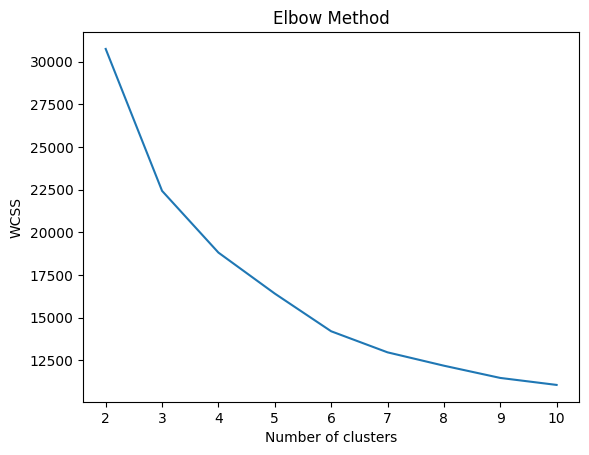

In [ ]:
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build KMeans Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=24)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3, random_state=24)

In [ ]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
#Assign clusters to the data set
df_['K3_clusterid'] = clusters_new.labels_

In [ ]:
df_.groupby('K3_clusterid').agg(['mean'])

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
K3_clusterid,,,,,,,,,,,,,,,,,
0,0.033829,3.764655e+04,2.417673e+04,3.505235e+10,0.057534,0.059689,0.041784,61.035681,57.923944,0.240000,0.407538,0.556929,0.035527,3.394581e+07,0.368819,7.506746e+08,5.307063e+08
1,0.013038,4.804314e+06,1.975551e+06,8.461556e+12,0.104577,0.013192,0.411538,77.807692,73.961538,0.553846,0.205308,0.692500,0.102154,8.038033e+08,0.619692,8.808477e+10,7.074662e+10
2,0.014835,9.138639e+04,4.592619e+04,2.513966e+11,0.067207,0.013014,0.383488,78.524489,72.718950,0.804567,0.230195,0.669557,0.100246,1.736475e+07,0.692990,5.475372e+09,5.190479e+09


profiling:

cluster 0:High birth rate. Low co2 emission,energy usage, GDP, health expenditure, internt usage, both male and female life sapns, mobile phone usage, urban population , tourism Inbound and outbound.

cluster 1:Low birth rate, infant mortality. High co2 emissions, energy usage, GDP, health EXP,internet usage, Tourism Inbound and outbound. Moderate life spans of male and female,mobile usage,urban population.

cluster 2:moderate birth rate, co2 emission, energy usage, GDP, health EXP, Internet usage, toursim inbound and outbound. High life spans, mobile phone usage, urban population

In [ ]:
#Build KMeans Cluster algorithm as k=4
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=24)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=24)

In [ ]:
#Assign clusters to the data set
df_['K4_clusterid'] = clusters_new.labels_

In [ ]:
df_ = df_.drop('K3_clusterid',axis=1)
df_.groupby('K4_clusterid').agg(['mean'])


,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
K4_clusterid,,,,,,,,,,,,,,,,,
0,0.038134,1.230196e+04,1.580762e+04,1.614885e+10,0.059484,0.072192,0.030367,56.283898,53.994350,0.211017,0.432904,0.535975,0.031112,1.744648e+07,0.339343,5.067786e+08,3.769241e+08
1,0.020914,7.648528e+04,3.465555e+04,7.946398e+10,0.054605,0.024381,0.142158,73.889444,68.529138,0.459540,0.305871,0.635935,0.058192,3.640589e+07,0.546255,1.738384e+09,1.200001e+09
2,0.012407,1.054987e+05,5.567095e+04,3.631132e+11,0.075236,0.009333,0.515239,80.341245,74.467492,0.974166,0.198822,0.678104,0.123071,1.585886e+07,0.746675,7.773293e+09,7.708339e+09
3,0.013038,4.804314e+06,1.975551e+06,8.461556e+12,0.104577,0.013192,0.411538,77.807692,73.961538,0.553846,0.205308,0.692500,0.102154,8.038033e+08,0.619692,8.808477e+10,7.074662e+10


In [ ]:
#Build KMeans Cluster algorithm as k=6
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=24)
clusters_new.fit(scaled_df)
#Assign clusters to the data set
df_['K6_clusterid'] = clusters_new.labels_
df_ = df_.drop('K4_clusterid',axis=1)
df_.groupby('K6_clusterid').agg(['mean'])

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
K6_clusterid,,,,,,,,,,,,,,,,,
0,0.038329,1.141171e+04,1.561966e+04,1.605596e+10,0.059297,0.072781,0.029726,56.050505,53.808081,0.211688,0.433909,0.535115,0.030961,1.759005e+07,0.337926,5.014161e+08,3.752492e+08
1,0.013011,5.364923e+04,2.896590e+04,1.362780e+11,0.071432,0.010529,0.482515,79.750852,73.903545,0.942979,0.208693,0.678343,0.112966,9.908161e+06,0.734294,4.322052e+09,3.376579e+09
2,0.021601,6.219411e+04,2.864776e+04,6.413515e+10,0.054537,0.025406,0.121151,73.435725,68.108744,0.424813,0.314058,0.630369,0.055568,2.282613e+07,0.531877,1.588759e+09,1.089283e+09
3,0.013769,4.799313e+06,2.250944e+06,1.330715e+13,0.161154,0.006692,0.653846,80.230769,75.153846,0.715385,0.204154,0.669385,0.126385,2.983420e+08,0.800923,1.408008e+11,1.024878e+11
4,0.010814,5.388087e+05,2.762215e+05,2.228677e+12,0.093559,0.004510,0.608824,82.970588,76.941176,1.003922,0.159392,0.669961,0.170667,6.941140e+07,0.784137,3.447619e+10,4.209311e+10
5,0.017654,3.046462e+06,1.117221e+06,2.342340e+12,0.044577,0.036962,0.100000,70.615385,67.807692,0.315385,0.262231,0.674885,0.062885,1.225428e+09,0.367154,2.241712e+10,2.373215e+10


# profiling:

cluster0: High birth rate, Infant Mortality Rate. Low co2 emission,energy usage, GDP, Internet usage, life span of male and female, mobile phone usage, low urban population, Low tourism Inbound and outbound as well.{we can say this group seem under developed.}

cluster1:Low birth rate but moderate Infant Mortality. moderate co2 emission, energy usage,GDP,internet usage,urban population. life Expectancy of female and male are better. High Mobile usage due to population(15-64) group is high. tourism inbound is high compare to outbound.{It seeems this group belongs developing country}

cluster 2: moderate birth rate, infant Mortality with less health exp. Moderate co2 emission, energy usage (which means carbon foot prints are ok). less GDP, internet usage but moderate mobile usage. life span of female and male moderate and moderate urban population.

# cluster 3:Low birth rate high health exp and low infant mortality rate.High GDP, tourism inbound and outbound as well, life spans are high, internet and mobile usage are also high and urban population is high comapre other groups.{it seems this group is good in terms of health, GDP, life spans ,technology and tourism but high carbon footprints.}

cluster 4:Low birth rate, infant mortality and moerate health exp. moderate co2 emission and energy usage.Good GDP. high internet and mobile usage. high life spans of male and femals, urban population. tourism outbound is greater than inbound in this group.

cluster 5: Highly populated group but Low birth rate and low health exp but less infanty mortality. High co2 emissions, energy usage, moderate GDP w.r.t population. Less internet and mobile usage. life spans are also not that good.  less urban population. moderate tourism inbound and outbound.

In [ ]:
df_.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,K6_clusterid
0,0.020,87931.0,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2
1,0.050,9542.0,7499.000000,9.129595e+09,0.034,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,0
2,0.043,1617.0,1983.000000,2.359122e+09,0.043,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,0
3,0.027,4276.0,1836.000000,5.788312e+09,0.047,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,0
4,0.046,1041.0,13489.333333,2.610959e+09,0.051,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,0


In [ ]:
labled_df = df_

In [ ]:
labled_df.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,K6_clusterid
0,0.020,87931.0,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2
1,0.050,9542.0,7499.000000,9.129595e+09,0.034,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,0
2,0.043,1617.0,1983.000000,2.359122e+09,0.043,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,0
3,0.027,4276.0,1836.000000,5.788312e+09,0.047,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,0
4,0.046,1041.0,13489.333333,2.610959e+09,0.051,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,0


#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan.fit(scaled_df)
dbscan.labels_

array([-1, -1,  7, ..., -1, -1, -1])

In [ ]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
df_ = pd.concat([df_,cl],axis=1)

In [ ]:
df_ = df_.drop("K6_clusterid", axis=1)
df_.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,cluster
0,0.020,87931.0,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,-1
1,0.050,9542.0,7499.000000,9.129595e+09,0.034,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,-1
2,0.043,1617.0,1983.000000,2.359122e+09,0.043,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,7
3,0.027,4276.0,1836.000000,5.788312e+09,0.047,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,-1
4,0.046,1041.0,13489.333333,2.610959e+09,0.051,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,0


In [ ]:
df_.cluster.value_counts()

-1      1969
 9        23
 20       17
 29       16
 7        14
        ... 
 47        4
 58        4
 57        4
 112       3
 104       3
Name: cluster, Length: 127, dtype: int64

In [ ]:
df_clust = df_.groupby('cluster').mean()
df_clust

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
cluster,,,,,,,,,,,,,,,,,
-1,0.020142,151256.523616,70926.938886,3.215708e+11,0.066622,0.026381,0.286287,73.464534,68.446927,0.673083,0.279487,0.638977,0.081523,3.696938e+07,0.596245,5.631684e+09,5.133520e+09
0,0.045600,1045.000000,18717.066667,3.534728e+09,0.053200,0.093000,0.000000,52.400000,50.200000,0.000000,0.466800,0.506800,0.026800,1.230875e+07,0.192800,3.500000e+07,4.360000e+07
1,0.036769,282.897436,21351.128205,1.545240e+09,0.040923,0.107923,0.000000,47.615385,44.307692,0.084615,0.414692,0.546154,0.039538,4.053495e+06,0.382923,6.902564e+07,6.207692e+07
2,0.046500,1954.625000,18955.125000,1.213929e+10,0.050625,0.108500,0.000000,48.875000,45.875000,0.037500,0.462750,0.509000,0.028000,5.186246e+07,0.367750,8.104167e+07,5.950000e+07
3,0.044667,305.500000,2725.888889,6.230930e+08,0.043333,0.060000,0.000000,57.166667,54.833333,0.083333,0.459333,0.514833,0.026167,1.329875e+06,0.501333,2.053778e+08,6.737778e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.011250,5564.666667,4106.750000,5.365685e+10,0.072000,0.002000,0.900000,83.750000,78.500000,1.450000,0.176000,0.684000,0.140250,5.135072e+05,0.887000,4.425250e+09,3.641250e+09
122,0.011000,114091.166667,79310.000000,7.940782e+11,0.120750,0.004000,0.900000,83.000000,79.000000,1.200000,0.174250,0.668500,0.156750,1.664845e+07,0.874250,1.951375e+10,2.052050e+10
123,0.011083,160.250000,78.000000,1.685513e+09,0.054167,0.003000,0.500000,85.666667,79.666667,1.050000,0.291000,0.638667,0.070333,3.090000e+04,0.931250,4.946667e+08,1.346667e+08


Too many groups.

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=4)
dbscan.fit(scaled_df)
df_ = df_.drop("cluster",axis=1)
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
df_ = pd.concat([df_,cl],axis=1)
df_clust = df_.groupby('cluster').mean()
df_clust

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
cluster,,,,,,,,,,,,,,,,,
-1,0.022339,115921.405690,56075.189239,2.459348e+11,0.063780,0.031495,0.247223,71.596413,66.870872,0.579048,0.299792,0.625447,0.074757,3.156216e+07,0.563867,4.420985e+09,3.998360e+09
0,0.010250,556.000000,14866.416667,2.844048e+09,0.072333,0.002333,0.833333,78.000000,72.666667,0.800000,0.203667,0.660000,0.135667,8.001800e+04,0.519000,8.293333e+08,1.900000e+08
1,0.010000,312.666667,1877.666667,5.661027e+09,0.043933,0.003000,0.833333,84.333333,80.000000,0.806667,0.383000,0.581667,0.035333,3.812640e+04,1.000000,7.148000e+08,1.034000e+08


In [ ]:
df_ = df_.drop("cluster",axis=1)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
# Define a range of epsilon and MinPts values to search
epsilon_values = [0.1, 0.2, 0.3]
min_samples_values = [1,2, 3, 4]

best_silhouette_score = -1
best_params = None

for epsilon in epsilon_values:
    for min_samples in min_samples_values:
        # Perform DBSCAN clustering with current parameters
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        dbscan.fit(scaled_df)
        #print(metrics.silhouette_score(scaled_df,dbscan.labels_))

        # Calculate the silhouette score
        silhouette_avg = metrics.silhouette_score(scaled_df,dbscan.labels_)
        print("silhouette_avg",silhouette_avg)

        # Check if this combination of parameters gives a better silhouette score
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = {'epsilon': epsilon, 'min_samples': min_samples}

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_silhouette_score}")


silhouette_avg 0.04045268070568171
silhouette_avg -0.5799847767868127
silhouette_avg -0.2875746417634122
silhouette_avg -0.09258270133098602
silhouette_avg 0.15156804796329745
silhouette_avg -0.3554087597248576
silhouette_avg -0.5175688232854941
silhouette_avg -0.4831843967413144
silhouette_avg 0.27543280449236285
silhouette_avg 0.006126916318700845
silhouette_avg -0.2779449459762539
silhouette_avg -0.4752283891979946
Best Parameters: {'epsilon': 0.3, 'min_samples': 1}
Best Silhouette Score: 0.27543280449236285


In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=1)
dbscan.fit(scaled_df)
#df_ = df_.drop("cluster",axis=1)
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
df_ = pd.concat([df_,cl],axis=1)
df_clust = df_.groupby('cluster').mean()
df_clust

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
cluster,,,,,,,,,,,,,,,,,
0,0.019600,89020.800000,2.890300e+04,6.389678e+10,0.036200,0.032000,0.000000,71.000000,67.800000,0.020000,0.318800,0.640200,0.041000,3.258148e+07,0.615000,1.206000e+08,2.462000e+08
1,0.050000,9542.000000,7.499000e+03,9.129595e+09,0.034000,0.128000,0.000000,47.000000,44.000000,0.000000,0.476000,0.499000,0.025000,1.392493e+07,0.324000,3.400000e+07,1.460000e+08
2,0.041000,2626.875000,2.485625e+03,3.730441e+09,0.045625,0.079875,0.000000,58.125000,55.000000,0.062500,0.447875,0.523625,0.028250,7.807628e+06,0.394875,1.153750e+08,6.187500e+07
3,0.027000,4276.000000,1.836000e+03,5.788312e+09,0.047000,0.054000,0.000000,52.000000,49.000000,0.100000,0.383000,0.587000,0.029000,1.755375e+06,0.532000,2.270000e+08,2.090000e+08
4,0.045600,1045.000000,1.871707e+04,3.534728e+09,0.053200,0.093000,0.000000,52.400000,50.200000,0.000000,0.466800,0.506800,0.026800,1.230875e+07,0.192800,3.500000e+07,4.360000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.017000,556.000000,7.666667e+01,6.944444e+08,0.052000,0.018000,0.500000,75.000000,70.000000,1.200000,0.257000,0.675000,0.068000,1.093730e+05,0.495000,9.300000e+07,1.400000e+07
1700,0.011667,160.000000,7.800000e+01,2.741753e+09,0.033333,0.004000,0.466667,82.666667,76.666667,0.433333,0.291000,0.638667,0.070333,3.242700e+04,0.911000,5.036667e+08,1.403333e+08
1701,0.013000,79142.666667,2.132446e+06,1.624460e+13,0.179000,0.006000,0.800000,81.000000,76.000000,1.000000,0.196000,0.667000,0.136000,3.138737e+08,0.811000,2.000920e+11,1.265730e+11


#classification

#considering kmeans(k=6) clustering model for doing classification problem.

In [ ]:
labled_df.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,K6_clusterid
0,0.020,87931.0,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2
1,0.050,9542.0,7499.000000,9.129595e+09,0.034,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,0
2,0.043,1617.0,1983.000000,2.359122e+09,0.043,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,0
3,0.027,4276.0,1836.000000,5.788312e+09,0.047,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,0
4,0.046,1041.0,13489.333333,2.610959e+09,0.051,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,0


#Logistic Regression

In [ ]:
correlation_matrix = labled_df.corr()

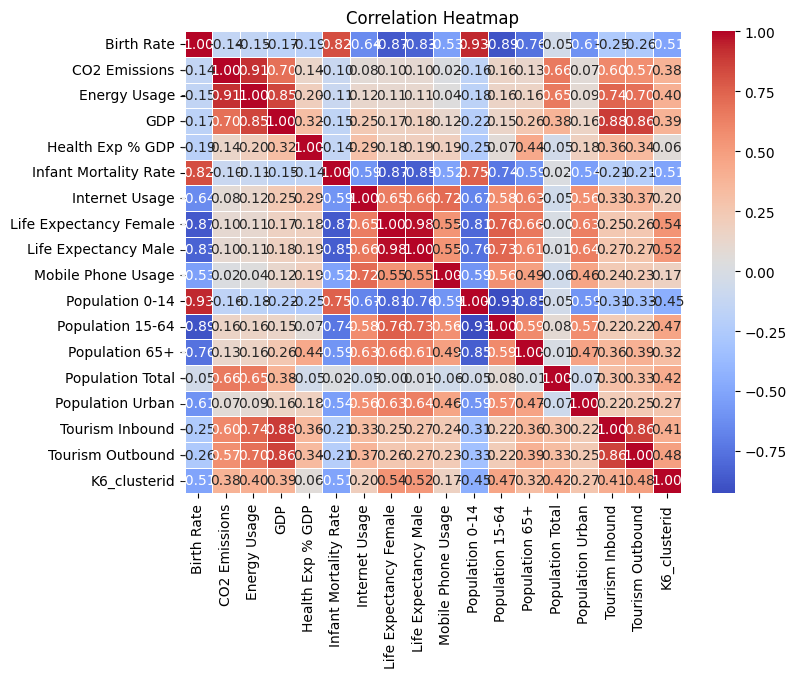

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#checking class imbalnce
print(labled_df['K6_clusterid'].value_counts())
print(labled_df['K6_clusterid'].value_counts(normalize=True))

1    978
2    892
0    693
4    102
5     26
3     13
Name: K6_clusterid, dtype: int64
1    0.361686
2    0.329882
0    0.256287
4    0.037722
5    0.009615
3    0.004808
Name: K6_clusterid, dtype: float64


# 5 and 3 classes are imblanced compare to other classes.

#building model with imblanced data and interpret classification report

In [ ]:
# Dividing our data into input and output variables
X = labled_df.iloc[:,:17]
Y = labled_df.iloc[:,17:]

In [ ]:
X.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,26998.000000,5.479006e+10,0.035,0.034,0.0,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,9542.0,7499.000000,9.129595e+09,0.034,0.128,0.0,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,1617.0,1983.000000,2.359122e+09,0.043,0.090,0.0,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,4276.0,1836.000000,5.788312e+09,0.047,0.054,0.0,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,1041.0,13489.333333,2.610959e+09,0.051,0.096,0.0,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


In [ ]:
Y.head()

,K6_clusterid
0,2
1,0
2,0
3,0
4,0


In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X,Y)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = classifier.predict(X)

In [ ]:
y_pred

array([3, 2, 1, ..., 1, 5, 1], dtype=int32)

In [ ]:
# Convert the NumPy array into a DataFrame
Y_pred_df = pd.DataFrame(y_pred, columns=['predicted'])

In [ ]:
predictedLabeled_df = pd.concat([Y, Y_pred_df], axis=1)

In [ ]:
predictedLabeled_df.head()

,K6_clusterid,predicted
0,2,3
1,0,2
2,0,1
3,0,1
4,0,5


#Testing Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[  0, 415,  83,  35,  45, 115],
       [  0, 813,   8,  31, 117,   9],
       [  0, 632,  26,  56, 135,  43],
       [  0,   0,   0,  10,   3,   0],
       [  0,  39,   0,   4,  52,   7],
       [  0,   0,   8,   1,   5,  12]])

In [ ]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       693
           1       0.43      0.83      0.57       978
           2       0.21      0.03      0.05       892
           3       0.07      0.77      0.13        13
           4       0.15      0.51      0.23       102
           5       0.06      0.46      0.11        26

    accuracy                           0.34      2704
   macro avg       0.15      0.43      0.18      2704
weighted avg       0.23      0.34      0.23      2704



There is coorelation but linear regression model not giving good scores.

#Decision Tree

In [ ]:
# splitting the data into equal percentage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, stratify=Y, random_state=1)

In [ ]:
y_train.value_counts()

K6_clusterid
1               684
2               624
0               485
4                72
5                18
3                 9
dtype: int64

In [ ]:
y_test.value_counts()

K6_clusterid
1               294
2               268
0               208
4                30
5                 8
3                 4
dtype: int64

In [ ]:
#We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.
from sklearn.tree import DecisionTreeClassifier

dTree_model1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print(dTree_model1.score(X_train, y_train)) # accuracy
print(dTree_model1.score(X_test, y_test))

1.0
0.9519704433497537


In [ ]:
y_train_pred = dTree_model1.predict(X_train)

In [ ]:
y_test_pred = dTree_model1.predict(X_test)

In [ ]:
# For the training data
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for Training Data:")
print(train_report)

# For the testing data
test_report = classification_report(y_test, y_test_pred)
print("\nClassification Report for Testing Data:")
print(test_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       1.00      1.00      1.00       684
           2       1.00      1.00      1.00       624
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        18

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       208
           1       0.94      0.95      0.95       294
           2       0.95      0.92      0.93       268
           3       1.00      1.00      1.00         4
           4       0.97      0.97      0.97        30
           5       0.78      0.88      0.82       

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a decision tree classifier
dTree_model2 = DecisionTreeClassifier(random_state=1)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  # None means unlimited depth
    'min_samples_leaf': [1, 2, 4, 8]
}

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(dTree_model2, param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 8]},
             scoring='accuracy')

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}


In [ ]:
# Get the best model
best_clf = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy with Best Model: {:.2f}%".format(test_accuracy * 100))

Test Accuracy with Best Model: 95.20%


#k fold

In [ ]:
from sklearn.model_selection import cross_val_score

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
Fold 1: Accuracy = 0.96
Fold 2: Accuracy = 0.97
Fold 3: Accuracy = 0.94
Fold 4: Accuracy = 0.94
Fold 5: Accuracy = 0.95


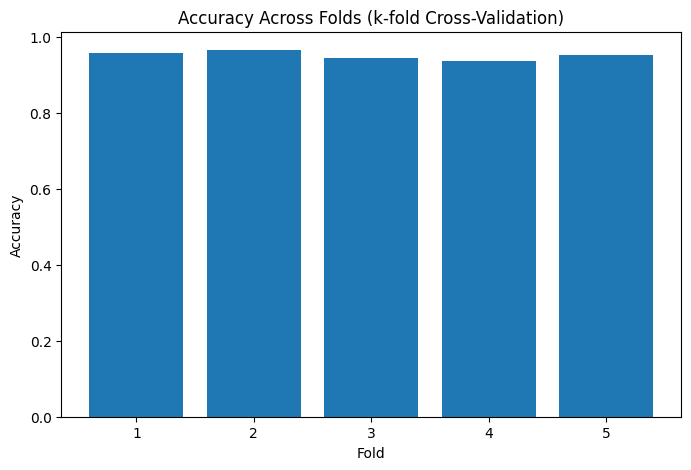

Test Accuracy with Best Model: 95.20%


In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=1)

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  # None means unlimited depth
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_clf = grid_search.best_estimator_

# Perform k-fold cross-validation and store the results
k = 5  # Number of folds
cv_results = cross_val_score(best_clf, X_train, y_train, cv=k)

# Print the accuracy for each fold
for fold, accuracy in enumerate(cv_results, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.2f}")

# Plot the variation of accuracy across folds
plt.figure(figsize=(8, 5))
plt.bar(range(1, k + 1), cv_results)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Across Folds (k-fold Cross-Validation)")
plt.show()

# Evaluate the best model on the test set
test_accuracy = best_clf.score(X_test, y_test)
print("Test Accuracy with Best Model: {:.2f}%".format(test_accuracy * 100))

#Ensemble Methods
#Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred = rf_classifier.predict(X_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Train Accuracy: 100.00%
Test Accuracy: 97.04%


In [ ]:
# For the training data
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for Training Data:")
print(train_report)

# For the testing data
test_report = classification_report(y_test, y_pred)
print("\nClassification Report for Testing Data:")
print(test_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       1.00      1.00      1.00       684
           2       1.00      1.00      1.00       624
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        18

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       208
           1       0.96      0.97      0.96       294
           2       0.97      0.95      0.96       268
           3       1.00      1.00      1.00         4
           4       0.97      1.00      0.98        30
           5       1.00      1.00      1.00       

Fold 1: Accuracy = 0.98
Fold 2: Accuracy = 0.98
Fold 3: Accuracy = 0.97
Fold 4: Accuracy = 0.95
Fold 5: Accuracy = 0.97


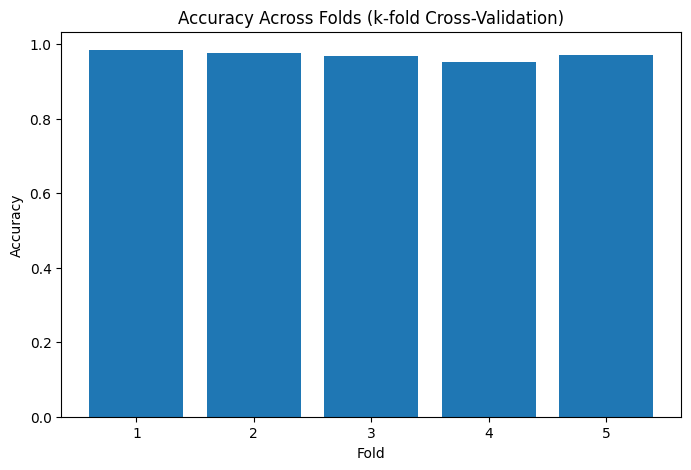

Test Accuracy: 97.04%


In [ ]:
# Create a Random Forest classifier
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(rf_classifier2, X_train, y_train, cv=k)

# Print the accuracy for each fold
for fold, accuracy in enumerate(cv_scores, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.2f}")

# Plot the variation in scores across folds
plt.figure(figsize=(8, 5))
plt.bar(range(1, k + 1), cv_scores)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Across Folds (k-fold Cross-Validation)")
plt.show()

# Fit the model to the full training data
rf_classifier2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier2.predict(X_test)



# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

In [ ]:
import pickle
filename = "trained_model.sav"
pickle.dump(rf_classifier,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open("trained_model.sav",'rb'))

In [ ]:
X_test.head(1)

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
254,0.032,1144.0,8136.333333,1.349327e+09,0.052,0.081,0.0,48.0,47.0,0.1,0.44,0.53,0.03,1074761.0,0.226,23000000.0,31000000.0


In [ ]:
y_country = [[0.032,1144.0,8136.333,1.349327e+09,0.052,0.081,0.0,48.0,47.0,0.1,0.44,0.53,0.03,1074761.0,0.226,23000000.0,31000000.0]]
pred_class = loaded_model.predict(y_country)
pred_class

array([0], dtype=int32)

In [ ]:
X_test.head(2)

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
254,0.032,1144.0,8136.333333,1.349327e+09,0.052,0.081,0.0,48.0,47.0,0.1,0.440,0.530,0.030,1074761.0,0.226,23000000.0,31000000.0
341,0.008,321651.0,134096.000000,3.800934e+10,0.057,0.015,0.0,74.0,63.0,0.0,0.168,0.691,0.141,48683865.0,0.672,759000000.0,676000000.0


In [ ]:
y_country = [[0.008,321651.0,134096.00,3.800934e+10,0.057,0.015,0.0,74.0,63.0,0.0,0.168,0.691,0.141,48683865.0,0.672,759000000.0,676000000.0]]
pred_class = loaded_model.predict(y_country)
pred_class

array([2], dtype=int32)